# Przygotowanie

• Get the data (2 cities)  
• Upload it to your tool of choice  
• Run linear regression model  
• Run LASSO  
• Run XGBoost + XAI

In [6]:
!pip install gdown -qq

In [7]:
!pip install shap

In [8]:
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import lasso_path
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import xgboost
import shap

In [9]:
# download data
url = 'https://drive.google.com/uc?id=1BtfKFKqilN8KHVg_yx8v9btYu3l-XbJP'
output = "listings_london.csv"
gdown.download(url, output)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1BtfKFKqilN8KHVg_yx8v9btYu3l-XbJP 



In [10]:
url = 'https://drive.google.com/uc?id=1ohuAfNGmJsl8GVehvtr17bOBr8SmvjHP'
output = "listings_toronto.csv"
gdown.download(url, output)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1ohuAfNGmJsl8GVehvtr17bOBr8SmvjHP 



In [11]:
!ls -lah

total 136M
drwxr-xr-x 1 root root 4.0K Jan 10 14:29 .
drwxr-xr-x 1 root root 4.0K Jan 10 14:27 ..
drwxr-xr-x 4 root root 4.0K Jan  8 14:20 .config
-rw-r--r-- 1 root root 112M Jan 10 14:28 listings_london.csv
-rw-r--r-- 1 root root  24M Jan 10 14:29 listings_toronto.csv
drwxr-xr-x 1 root root 4.0K Jan  8 14:21 sample_data


In [12]:
pd.set_option('display.max_columns', None)

In [13]:
dataL = pd.read_csv('listings_london.csv')
dataL.head(3)

id                          listing_url       scrape_id last_scraped  \
0  198258  https://www.airbnb.com/rooms/198258  20231210055232   2023-12-10   
1   33332   https://www.airbnb.com/rooms/33332  20231210055232   2023-12-10   
2   42010   https://www.airbnb.com/rooms/42010  20231210055232   2023-12-10   

        source                                               name  \
0  city scrape  Rental unit in Barking · ★4.74 · 1 bedroom · 1...   
1  city scrape  Home in  St Margaret's, Isleworth · ★4.40 · 1 ...   
2  city scrape  Home in East Finchley · ★4.88 · 1 bedroom · 1 ...   

   description                              neighborhood_overview  \
0          NaN  I live in Barking town centre, at one time the...   
1          NaN                             Peaceful and friendly.   
2          NaN  We have a unique cinema called the Phoenix whi...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/airflow/Hosti...   967537   
1  https://a0.muscache.com/pictures/miso/Hosting-...   144444   
2  https://a0.muscache.com/pictures/airflow/Hosti...   157884   

                                   host_url     host_name  host_since  \
0  https://www.airbnb.com/users/show/967537          Ryan  2011-08-14   
1  https://www.airbnb.com/users/show/144444       Chi-Chi  2010-06-14   
2  https://www.airbnb.com/users/show/157884  Agri & Roger  2010-07-04   

               host_location  \
0    Barking, United Kingdom   
1  Isleworth, United Kingdom   
2     London, United Kingdom   

                                          host_about  host_response_time  \
0  Do the Math\r\n\r\nHi all, im just a crazy kid...      within an hour   
1  Quite busy and often in a different place ever...                 NaN   
2  We are a happy couple who live in a wonderful ...  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                  75%                 f   
1                NaN                  NaN                 f   
2               100%                 100%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/360a7...   
1  https://a0.muscache.com/im/pictures/user/8028d...   
2  https://a0.muscache.com/im/users/157884/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/360a7...                NaN   
1  https://a0.muscache.com/im/pictures/user/8028d...     LB of Hounslow   
2  https://a0.muscache.com/im/users/157884/profil...     LB of Haringey   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  1.0                        1.0  ['email', 'phone']   
1                  2.0                        2.0  ['email', 'phone']   
2                  2.0                        4.0  ['email', 'phone']   

  host_has_profile_pic host_identity_verified  \
0                    t                      t   
1                    t                      f   
2                    t                      t   

                                       neighbourhood neighbourhood_cleansed  \
0                    Barking, London, United Kingdom   Barking and Dagenham   
1   St Margaret's, Isleworth, Middlesex, United K...   Richmond upon Thames   
2                      East Finchley, United Kingdom                 Barnet   

   neighbourhood_group_cleansed  latitude  longitude  \
0                           NaN   51.5343    0.08178   
1                           NaN   51.4641   -0.32498   
2                           NaN   51.5859   -0.16434   

                 property_type     room_type  accommodates  bathrooms  \
0  Private room in rental unit  Private room             1        NaN   
1         Private room in home  Private room             2        NaN   
2         Private room in home  Private room             2        NaN   

   bathrooms_text  bedrooms  beds amenities 

In [14]:
dataT = pd.read_csv('listings_toronto.csv')
dataT.head(3)

id                                       listing_url  \
0  1002736951366032648  https://www.airbnb.com/rooms/1002736951366032648   
1   716133555965651038   https://www.airbnb.com/rooms/716133555965651038   
2             27278791             https://www.airbnb.com/rooms/27278791   

        scrape_id last_scraped       source  \
0  20231212054246   2023-12-12  city scrape   
1  20231212054246   2023-12-12  city scrape   
2  20231212054246   2023-12-12  city scrape   

                                                name  description  \
0  Bungalow in Toronto · ★New · 1 bedroom · 1 bed...          NaN   
1  Townhouse in North York · 1 bedroom · 2 beds ·...          NaN   
2  Home in Toronto · ★4.91 · 1 bedroom · 2 beds ·...          NaN   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  This house is on a very quiet street of the Ce...   

                                         picture_url    host_id  \
0  https://a0.muscache.com/pictures/8c0a277f-2ce5...  273730029   
1  https://a0.muscache.com/pictures/miso/Hosting-...  474878080   
2  https://a0.muscache.com/pictures/miso/Hosting-...  141166875   

                                      host_url      host_name  host_since  \
0  https://www.airbnb.com/users/show/273730029  Tran Thien Ly  2019-07-05   
1  https://www.airbnb.com/users/show/474878080        Huu-Hoa  2022-08-13   
2  https://www.airbnb.com/users/show/141166875         Andrew  2017-07-18   

     host_location                                         host_about  \
0  Toronto, Canada  "The most beautiful things in life are not thi...   
1  Toronto, Canada                                                NaN   
2  Toronto, Canada                                                NaN   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour               100%                  98%   
1     within an hour               100%                  95%   
2     within an hour               100%                  99%   

  host_is_superhost                                 host_thumbnail_url  \
0               NaN  https://a0.muscache.com/im/pictures/user/fe5d9...   
1                 t  https://a0.muscache.com/im/pictures/user/ca5fb...   
2                 t  https://a0.muscache.com/im/pictures/user/247f8...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/fe5d9...          Westmount   
1  https://a0.muscache.com/im/pictures/user/ca5fb...                NaN   
2  https://a0.muscache.com/im/pictures/user/247f8...        The Westway   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  5.0                        6.0  ['email', 'phone']   
1                  4.0                        5.0  ['email', 'phone']   
2                  3.0                        7.0  ['email', 'phone']   

  host_has_profile_pic host_identity_verified             neighbourhood  \
0                    t                      t                       NaN   
1                    t                      t                       NaN   
2                    t                      t  Toronto, Ontario, Canada   

          neighbourhood_cleansed  neighbourhood_group_cleansed   latitude  \
0       Humber Heights-Westmount                           NaN  43.686389   
1           Downsview-Roding-CFB                           NaN  43.736490   
2  Kingsview Village-The Westway                           NaN  43.696360   

   longitude              property_type     room_type  accommodates  \
0 -79.524655   Private room in bungalow  Private room             2   
1 -79.474800  Private room in townhouse  Private room             3   
2 -79.535650       Private room in home  Private room             4   

   bathrooms  bathrooms_text  bedrooms  beds amenities    price  \
0        NaN          1 bath       NaN   1.

# Londyn

## Obróbka danych

In [15]:
dataL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91778 non-null  int64  
 1   listing_url                                   91778 non-null  object 
 2   scrape_id                                     91778 non-null  int64  
 3   last_scraped                                  91778 non-null  object 
 4   source                                        91778 non-null  object 
 5   name                                          91778 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         48999 non-null  object 
 8   picture_url                                   91767 non-null  object 
 9   host_id                                       91778 non-null 

In [16]:
# Procentowy wynik wartości NaN w kolumnach
dataL1 = dataL.isna().sum() > 0
dataL.loc[:, dataL1].isna().sum().sort_values(ascending=False) / len(dataL) * 100

description                     100.000000
neighbourhood_group_cleansed    100.000000
license                         100.000000
calendar_updated                100.000000
bathrooms                       100.000000
bedrooms                         99.979298
host_about                       48.131360
host_neighbourhood               47.144196
neighborhood_overview            46.611388
neighbourhood                    46.610299
host_response_rate               33.420863
host_response_time               33.420863
host_acceptance_rate             27.994726
review_scores_value              26.284077
last_review                      26.284077
first_review                     26.284077
reviews_per_month                26.284077
review_scores_location           26.282987
review_scores_checkin            26.280808
review_scores_communication      26.250300
review_scores_accuracy           26.245941
review_scores_cleanliness        26.236135
review_scores_rating             26.216522
host_locati

In [17]:
# usuwanie niepotrzebnych kolumn z największymi brakami w danych
dataL.drop([
    'description',
    'neighbourhood_group_cleansed', # zamiast tego można użyć neighbourhood_cleansed
    'license',
    'calendar_updated',
    'bedrooms', # nie ma skąd wziąć tej informacji
    'amenities' # puste tabele
    ], axis=1, inplace=True)

In [18]:
# bathrooms_text na bathrooms
dataL['bathrooms_text'].unique()

array(['1 shared bath', '1 private bath', '1.5 baths', '1 bath', nan,
       '3 baths', '1.5 shared baths', '2 baths', '3.5 baths', '2.5 baths',
       'Half-bath', '4 baths', '2.5 shared baths', '2 shared baths',
       '6.5 baths', '4.5 baths', '0 baths', '3 shared baths',
       'Shared half-bath', '5.5 baths', '5 baths', '0 shared baths',
       'Private half-bath', '7 baths', '3.5 shared baths', '6 baths',
       '5.5 shared baths', '4.5 shared baths', '5 shared baths',
       '12 baths', '4 shared baths', '48 baths', '8 baths', '12.5 baths',
       '13 baths', '10.5 baths', '16.5 baths', '10 baths', '7.5 baths',
       '7 shared baths', '9 baths', '8 shared baths', '17 baths',
       '9.5 baths', '8.5 baths', '23 baths', '16 baths',
       '13 shared baths', '6 shared baths', '22 baths', '20 baths'],
      dtype=object)

In [19]:
dataL['bathrooms'] = dataL['bathrooms_text'].str.extract('([\d.]+)').astype(float)
dataL['bathrooms'] = np.where(dataL['bathrooms_text'] == 'Half-bath', 0.5, dataL['bathrooms'])

In [20]:
# zakładamy że jak nie ma wprowadzonej to jest 1
dataL['bathrooms'].mode()

0    1.0
Name: bathrooms, dtype: float64

In [21]:
dataL['bathrooms'].fillna(1, inplace=True)
dataL['bathrooms'].unique()

array([ 1. ,  1.5,  3. ,  2. ,  3.5,  2.5,  0.5,  4. ,  6.5,  4.5,  0. ,
        5.5,  5. ,  7. ,  6. , 12. , 48. ,  8. , 12.5, 13. , 10.5, 16.5,
       10. ,  7.5,  9. , 17. ,  9.5,  8.5, 23. , 16. , 22. , 20. ])

In [22]:
# zamiana t/f na 1/0 zakładając, że jeśli NaN to f

dataL[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].head(3)

host_is_superhost host_has_profile_pic host_identity_verified  \
0                 f                    t                      t   
1                 f                    t                      f   
2                 t                    t                      t   

  has_availability instant_bookable  
0                t                f  
1                t                f  
2                t                t

In [23]:
mapping_func = {'t' : 1, 'f' : 0}
kolumnytf = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
dataL[kolumnytf] = dataL[kolumnytf].applymap(lambda x: mapping_func.get(x, 0)).astype(bool)

In [24]:
# wartości procentowe na ułamki
dataL[['host_response_rate', 'host_acceptance_rate']].head(3)

host_response_rate host_acceptance_rate
0               100%                  75%
1                NaN                  NaN
2               100%                 100%

In [25]:
kolumnypr = ['host_response_rate', 'host_acceptance_rate']
dataL[kolumnypr] = dataL[kolumnypr].apply(lambda x: x.str.replace('%','').astype(float) / 100)

In [26]:
dataL[kolumnypr].isna().sum() / len(dataL[kolumnypr]) * 100

host_response_rate      33.420863
host_acceptance_rate    27.994726
dtype: float64

In [27]:
# Dane zostaną zamienione wartościami średnimi
dataL[kolumnypr].describe()

host_response_rate  host_acceptance_rate
count        61105.000000          66085.000000
mean             0.916160              0.835315
std              0.218125              0.257136
min              0.000000              0.000000
25%              0.970000              0.780000
50%              1.000000              0.960000
75%              1.000000              1.000000
max              1.000000              1.000000

In [28]:
dataL['host_response_rate'].fillna(round(dataL['host_response_rate'].mean(), 2), inplace=True)
dataL['host_acceptance_rate'].fillna(round(dataL['host_acceptance_rate'].mean(), 2), inplace=True)

In [29]:
# daty
kolumnydat = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
dataL[kolumnydat].head(3)

last_scraped  host_since calendar_last_scraped first_review last_review
0   2023-12-10  2011-08-14            2023-12-10   2011-08-22  2023-03-16
1   2023-12-10  2010-06-14            2023-12-10   2010-10-16  2022-08-01
2   2023-12-10  2010-07-04            2023-12-10   2010-09-22  2023-12-03

In [30]:
dataL[kolumnydat] = dataL[kolumnydat].apply(pd.to_datetime)

In [31]:
# cena
dataL['price'] = dataL['price'].str.replace('[$,]','').astype(float)

The default value of regex will change from True to False in a future version.


In [32]:
dataL['price'].describe()

count    87598.000000
mean       182.141773
std        394.013315
min          1.000000
25%         65.000000
50%        115.000000
75%        196.000000
max      53588.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

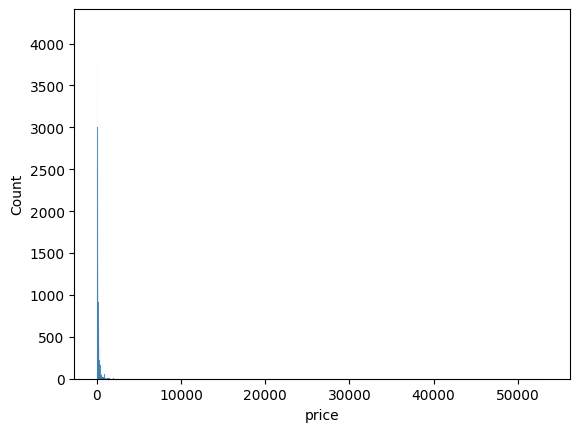

In [33]:
sns.histplot(x = dataL['price'])

In [34]:
filtered = dataL[~np.isnan(dataL['price'])]['price']
perc = np.percentile(filtered, 95)
print('95% wartości price znajduje się w przedziale do: {0:.2f}'.format(perc))
dataL = dataL[dataL['price'] < perc]

95% wartości price znajduje się w przedziale do: 500.00


<Axes: xlabel='price', ylabel='Count'>

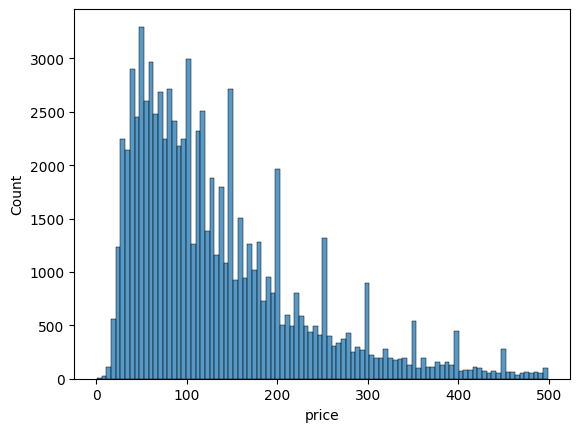

In [35]:
sns.histplot(x = dataL['price'])

In [36]:
dataL.head(3)

id                          listing_url       scrape_id last_scraped  \
0  198258  https://www.airbnb.com/rooms/198258  20231210055232   2023-12-10   
1   33332   https://www.airbnb.com/rooms/33332  20231210055232   2023-12-10   
2   42010   https://www.airbnb.com/rooms/42010  20231210055232   2023-12-10   

        source                                               name  \
0  city scrape  Rental unit in Barking · ★4.74 · 1 bedroom · 1...   
1  city scrape  Home in  St Margaret's, Isleworth · ★4.40 · 1 ...   
2  city scrape  Home in East Finchley · ★4.88 · 1 bedroom · 1 ...   

                               neighborhood_overview  \
0  I live in Barking town centre, at one time the...   
1                             Peaceful and friendly.   
2  We have a unique cinema called the Phoenix whi...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/airflow/Hosti...   967537   
1  https://a0.muscache.com/pictures/miso/Hosting-...   144444   
2  https://a0.muscache.com/pictures/airflow/Hosti...   157884   

                                   host_url     host_name host_since  \
0  https://www.airbnb.com/users/show/967537          Ryan 2011-08-14   
1  https://www.airbnb.com/users/show/144444       Chi-Chi 2010-06-14   
2  https://www.airbnb.com/users/show/157884  Agri & Roger 2010-07-04   

               host_location  \
0    Barking, United Kingdom   
1  Isleworth, United Kingdom   
2     London, United Kingdom   

                                          host_about  host_response_time  \
0  Do the Math\r\n\r\nHi all, im just a crazy kid...      within an hour   
1  Quite busy and often in a different place ever...                 NaN   
2  We are a happy couple who live in a wonderful ...  within a few hours   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                1.00                  0.75              False   
1                0.92                  0.84              False   
2                1.00                  1.00               True   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/360a7...   
1  https://a0.muscache.com/im/pictures/user/8028d...   
2  https://a0.muscache.com/im/users/157884/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/360a7...                NaN   
1  https://a0.muscache.com/im/pictures/user/8028d...     LB of Hounslow   
2  https://a0.muscache.com/im/users/157884/profil...     LB of Haringey   

   host_listings_count  host_total_listings_count  host_verifications  \
0                  1.0                        1.0  ['email', 'phone']   
1                  2.0                        2.0  ['email', 'phone']   
2                  2.0                        4.0  ['email', 'phone']   

   host_has_profile_pic  host_identity_verified  \
0                  True                    True   
1                  True                   False   
2                  True                    True   

                                       neighbourhood neighbourhood_cleansed  \
0                    Barking, London, United Kingdom   Barking and Dagenham   
1   St Margaret's, Isleworth, Middlesex, United K...   Richmond upon Thames   
2                      East Finchley, United Kingdom                 Barnet   

   latitude  longitude                property_type     room_type  \
0   51.5343    0.08178  Private room in rental unit  Private room   
1   51.4641   -0.32498         Private room in home  Private room   
2   51.5859   -0.16434         Private room in home  Private room   

   accommodates  bathrooms  bathrooms_text  beds  price  minimum_nights  \
0             1        1.0   1 shared bath   1.0   67.0               2   
1             2        1.0  1 private bath   1.0  140.0               2   
2             2        1.0   1 shared bath   1.0   65.0               4   

   maximum_nights  m

In [37]:
dataL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83016 entries, 0 to 91777
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            83016 non-null  int64         
 1   listing_url                                   83016 non-null  object        
 2   scrape_id                                     83016 non-null  int64         
 3   last_scraped                                  83016 non-null  datetime64[ns]
 4   source                                        83016 non-null  object        
 5   name                                          83016 non-null  object        
 6   neighborhood_overview                         45108 non-null  object        
 7   picture_url                                   83006 non-null  object        
 8   host_id                                       83016 non-null  int6

In [38]:
dataL.loc[:, dataL1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataL) * 100

reviews_per_month              23.094343
review_scores_value            23.085911
review_scores_location         23.083502
review_scores_checkin          23.082297
review_scores_communication    23.054592
review_scores_accuracy         23.050978
review_scores_cleanliness      23.042546
review_scores_rating           23.024477
beds                            1.217838
host_listings_count             0.001205
host_total_listings_count       0.001205
maximum_nights_avg_ntm          0.000000
host_response_rate              0.000000
minimum_nights_avg_ntm          0.000000
host_acceptance_rate            0.000000
minimum_maximum_nights          0.000000
maximum_minimum_nights          0.000000
minimum_minimum_nights          0.000000
price                           0.000000
bathrooms                       0.000000
maximum_maximum_nights          0.000000
dtype: float64

In [39]:
dataL['reviews_per_month'].describe()

count    63844.000000
mean         1.045015
std          1.362418
min          0.010000
25%          0.180000
50%          0.560000
75%          1.360000
max         48.590000
Name: reviews_per_month, dtype: float64

In [40]:
# średnia 1 a max 48 -> są wartości odstające

In [41]:
dataH = dataL[(dataL['reviews_per_month'] < 1.5)]['reviews_per_month']

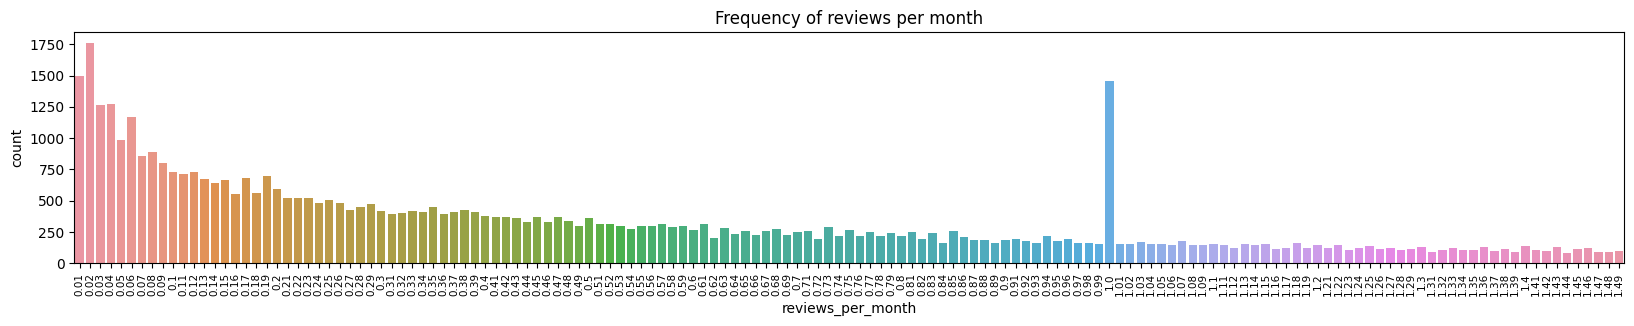

In [42]:
plt.figure(figsize=(20,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90, size=7.5)
plt.show()

In [43]:
dataH = dataL[(dataL['reviews_per_month'] < 50) & (dataL['reviews_per_month'] > 10)]['reviews_per_month']

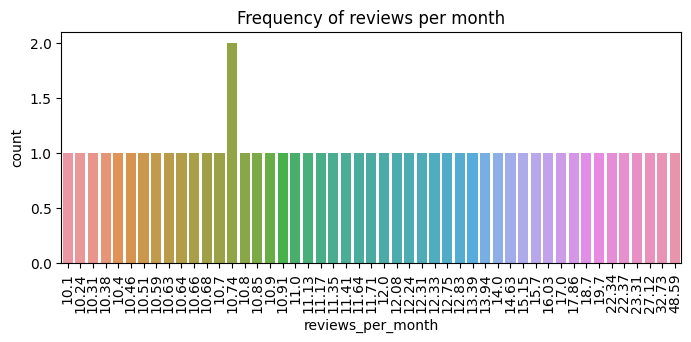

In [44]:
plt.figure(figsize=(8,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90)
plt.show()

In [45]:
# Trzeba wyfiltrować wartości NaN by policzyć percentyle - powyżej 95% wyniki można odrzucić
filtered = dataL[~np.isnan(dataL['reviews_per_month'])]['reviews_per_month']
perc = np.percentile(filtered, 95)
print('95% wartości reviews_per_month znajduje się w przedziale do: {0:.2f}'.format(perc))

95% wartości reviews_per_month znajduje się w przedziale do: 3.80


In [46]:
dataL['reviews_per_month'].isna().sum()

19172

In [47]:
filtered.describe()

count    63844.000000
mean         1.045015
std          1.362418
min          0.010000
25%          0.180000
50%          0.560000
75%          1.360000
max         48.590000
Name: reviews_per_month, dtype: float64

In [48]:
filtered = filtered[filtered < perc]

In [49]:
# można odrzucić takie outliery
dataL = dataL[dataL['reviews_per_month'] < perc]

In [50]:
dataL['reviews_per_month'].describe()

count    60640.000000
mean         0.817291
std          0.852466
min          0.010000
25%          0.160000
50%          0.510000
75%          1.160000
max          3.790000
Name: reviews_per_month, dtype: float64

In [51]:
dataL.loc[:, dataL1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataL) * 100

beds                           1.086741
review_scores_value            0.084103
review_scores_location         0.080805
review_scores_checkin          0.079156
review_scores_communication    0.041227
review_scores_accuracy         0.036280
review_scores_cleanliness      0.024736
host_response_rate             0.000000
minimum_nights_avg_ntm         0.000000
review_scores_rating           0.000000
maximum_nights_avg_ntm         0.000000
maximum_maximum_nights         0.000000
host_acceptance_rate           0.000000
minimum_maximum_nights         0.000000
maximum_minimum_nights         0.000000
minimum_minimum_nights         0.000000
price                          0.000000
bathrooms                      0.000000
host_total_listings_count      0.000000
host_listings_count            0.000000
reviews_per_month              0.000000
dtype: float64

In [52]:
dataL['beds'].unique()

array([ 1.,  2.,  4.,  9.,  3.,  6., nan,  5.,  7.,  8., 10., 13., 50.,
       12., 11., 14., 15., 18., 28., 21.])

In [53]:
dataL['beds'].mode()

0    1.0
Name: beds, dtype: float64

In [54]:
dataL['beds'].fillna(1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
dataL['beds'].isna().sum()

0

In [56]:
# review
rev = ['review_scores_value', 'review_scores_location', 'review_scores_checkin', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_cleanliness']
dataL[rev].agg(['median', 'mean']).T

median      mean
review_scores_value            4.75  4.601356
review_scores_location         4.84  4.718782
review_scores_checkin          4.94  4.781300
review_scores_communication    4.97  4.804904
review_scores_accuracy         4.88  4.718637
review_scores_cleanliness      4.80  4.631247

In [57]:
# wypełnimy to średnimi
for kol in rev:
  dataL[kol].fillna(dataL[kol].mean(), inplace=True)
dataL[rev].isna().sum()

review_scores_value            0
review_scores_location         0
review_scores_checkin          0
review_scores_communication    0
review_scores_accuracy         0
review_scores_cleanliness      0
dtype: int64

In [58]:
# sprawdzenie czy są jakiekolwiek wartości nan w typach numerycznych
dataL.select_dtypes(include='number').isna().sum().sum()

0

In [59]:
# z kategorycznych do analizy można wziąć: room_type, neighbourhood_cleansed
label_encoder = LabelEncoder()
dataL['room_type_encoded'] = label_encoder.fit_transform(dataL['room_type'])
dataL['neighbourhood_cleansed_encoded'] = label_encoder.fit_transform(dataL['neighbourhood_cleansed'])

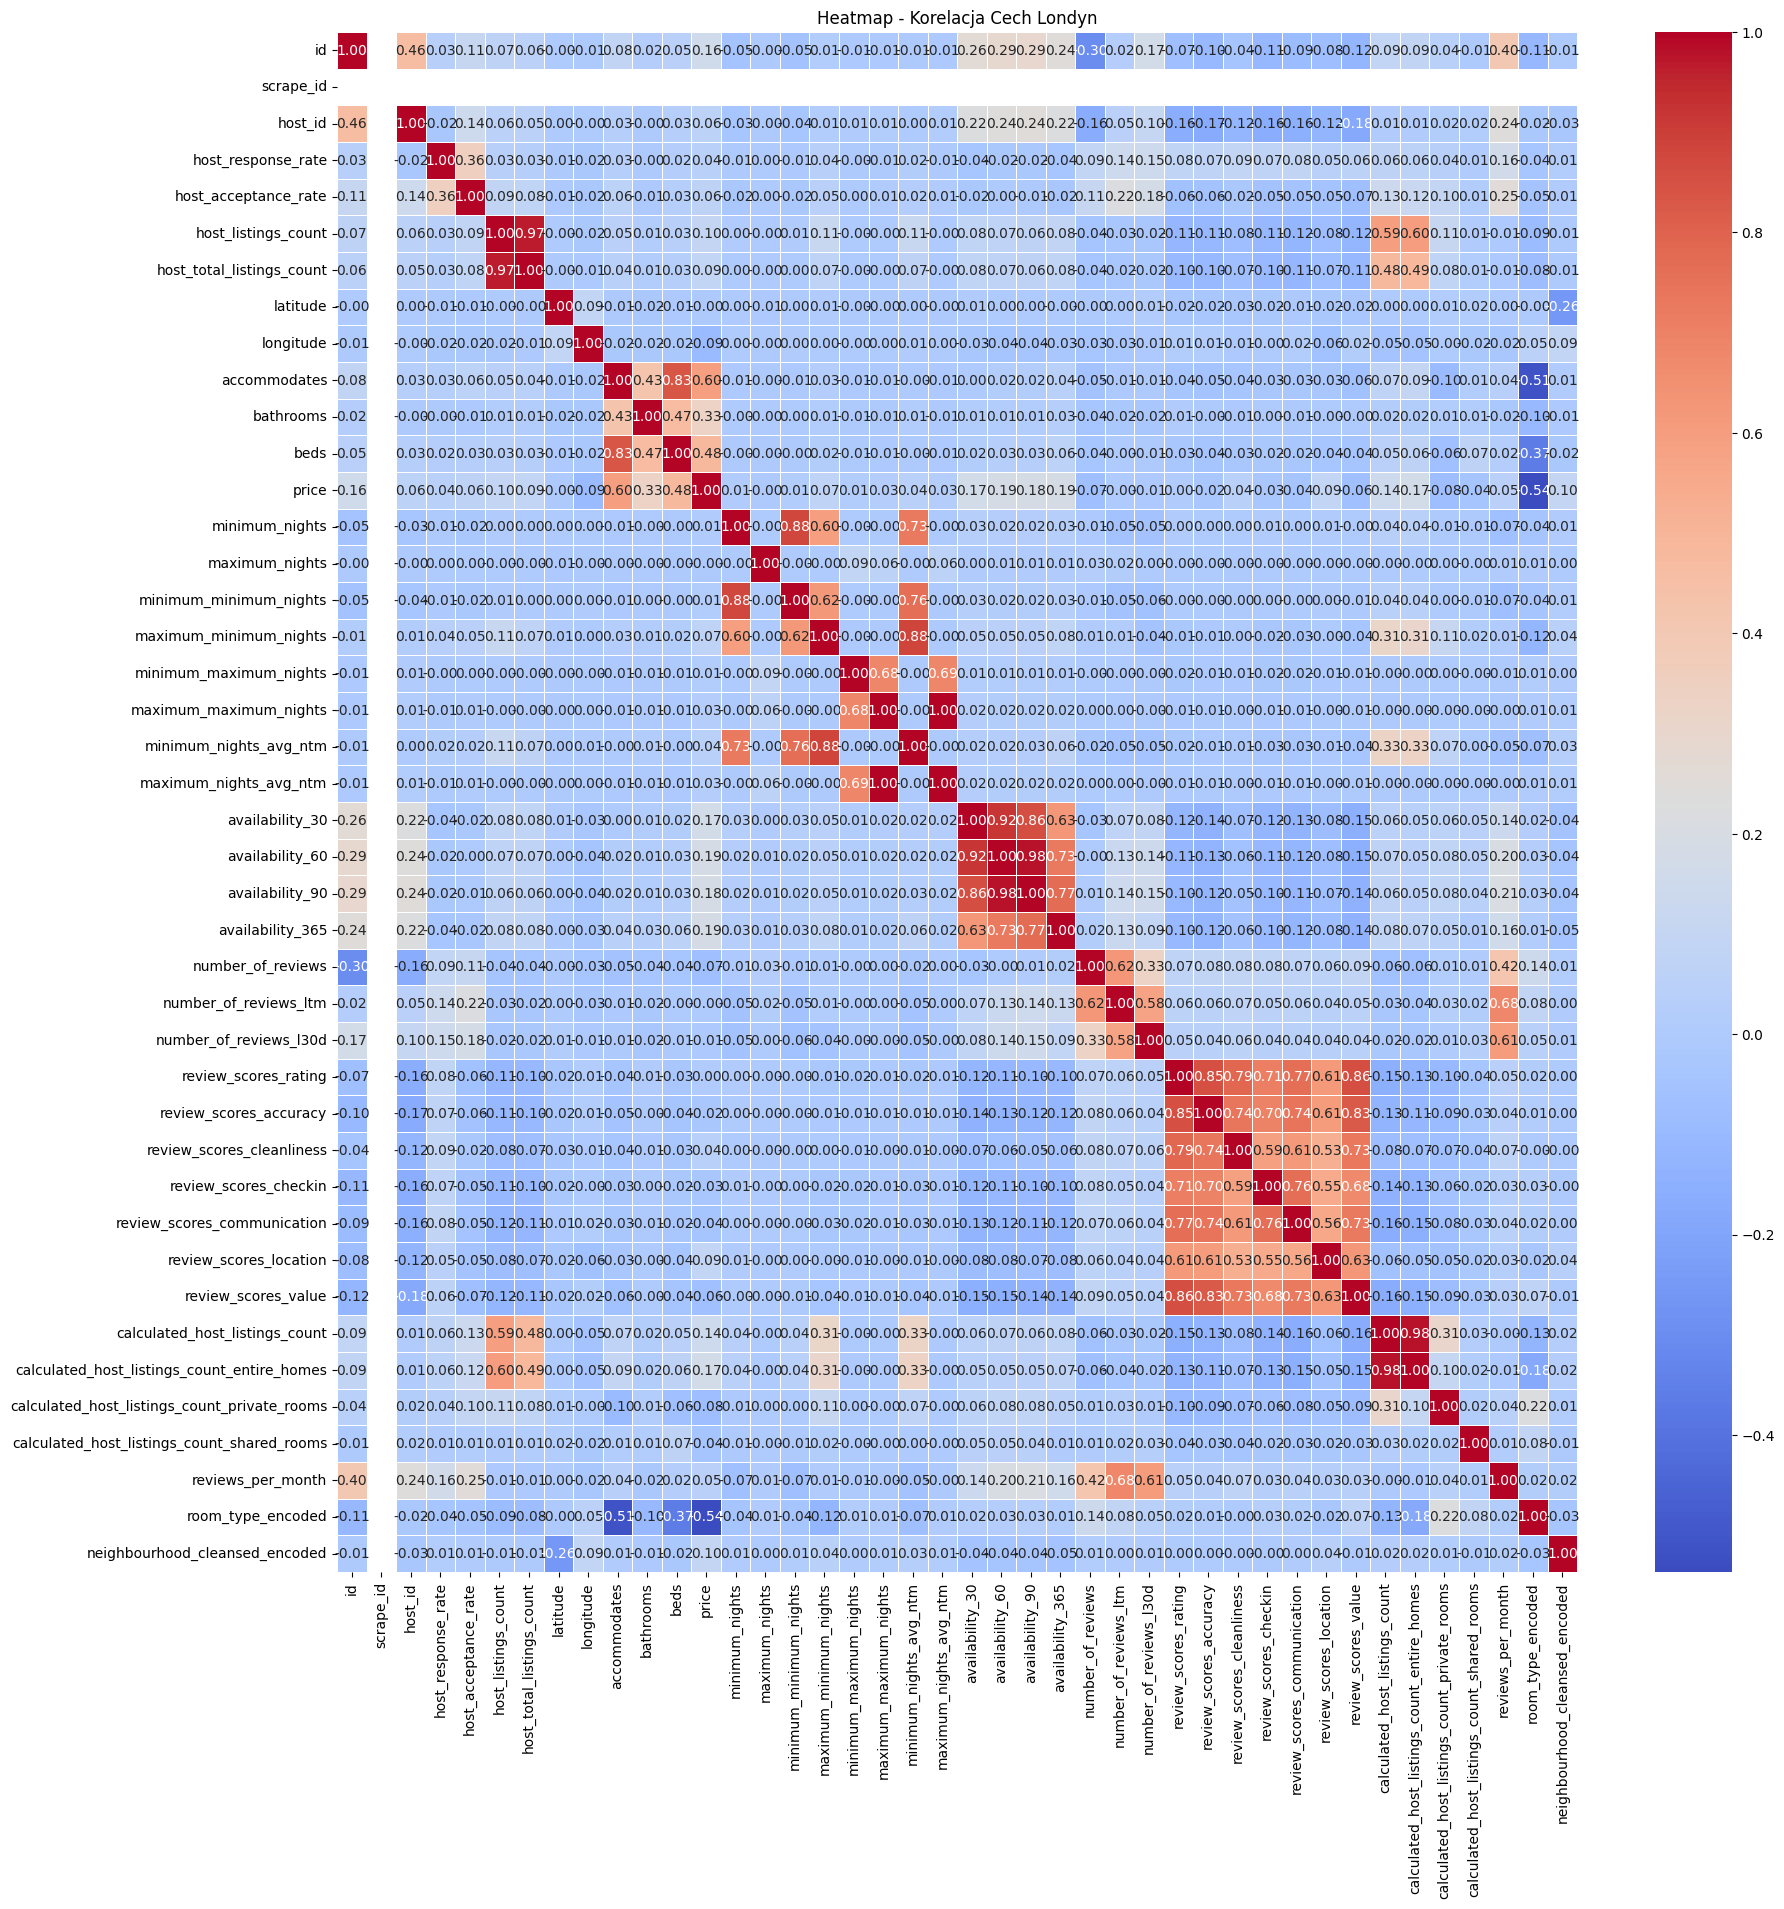

In [60]:
# Korelacja cech Londyn
plt.figure(figsize=(20, 20))
sns.heatmap(dataL.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap - Korelacja Cech Londyn')
plt.show()

In [61]:
all_num_feats = [x for x in dataL.dtypes[(dataL.dtypes != 'object') & (dataL.dtypes != 'datetime64[ns]')].index if not ('id' in x) and not ('price' in x)]

In [62]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [63]:
dataL[all_num_feats].describe().T

count      mean         std  \
host_response_rate                           60640.00      0.94        0.14   
host_acceptance_rate                         60640.00      0.85        0.20   
host_listings_count                          60640.00     19.26      105.29   
host_total_listings_count                    60640.00     36.55      236.57   
latitude                                     60640.00     51.51        0.05   
longitude                                    60640.00     -0.13        0.10   
accommodates                                 60640.00      3.12        1.84   
bathrooms                                    60640.00      1.29        0.57   
beds                                         60640.00      1.76        1.17   
minimum_nights                               60640.00      5.05       20.00   
maximum_nights                               60640.00   9338.60  2131760.69   
minimum_minimum_nights                       60640.00      4.59       18.88   
maximum_minimum_nights                       60640.00     10.04       31.61   
minimum_maximum_nights                       60640.00 257356.77 23169778.90   
maximum_maximum_nights                       60640.00 540683.91 33838209.55   
minimum_nights_avg_ntm                       60640.00      6.81       25.92   
maximum_nights_avg_ntm                       60640.00 540025.59 33796909.00   
availability_30                              60640.00      8.60       10.03   
availability_60                              60640.00     21.24       22.25   
availability_90                              60640.00     34.47       35.00   
availability_365                             60640.00    119.74      133.51   
number_of_reviews                            60640.00     22.00       39.32   
number_of_reviews_ltm                        60640.00      6.37        9.97   
number_of_reviews_l30d                       60640.00      0.50        1.06   
review_scores_rating                         60640.00      4.67        0.52   
review_scores_accuracy                       60640.00      4.72        0.49   
review_scores_cleanliness                    60640.00      4.63        0.54   
review_scores_checkin                        60640.00      4.78        0.45   
review_scores_communication                  60640.00      4.80        0.44   
review_scores_location                       60640.00      4.72        0.42   
review_scores_value                          60640.00      4.60        0.53   
calculated_host_listings_count               60640.00     12.61       39.07   
calculated_host_listings_count_entire_homes  60640.00     10.35       36.91   
calculated_host_listings_count_private_rooms 60640.00      2.09        7.87   
calculated_host_listings_count_shared_rooms  60640.00      0.02        0.23   
reviews_per_month                            60640.00      0.82        0.85   
room_type_encoded                            60640.00      0.73        0.96   
neighbourhood_cleansed_encoded               60640.00     18.67        9.70   

                                               min   25%    50%     75%  \
host_response_rate                            0.00  0.92   1.00    1.00   
host_acceptance_rate                          0.00  0.84   0.89    1.00   
host_listings_count                           1.00  1.00   2.00    6.00   
host_total_listings_count                     1.00  1.00   3.00   10.00   
latitude                                     51.30 51.48  51.51   51.54   
longitude                                    -0.50 -0.19  -0.12   -0.07   
accommodates                                  1.00  2.00   2.00    4.00   
bathrooms                                     0.00  1.00   1.00    1.50   
beds                                          1.00  1.00   1.00    2.00   
minimum_nights                                1.00  1.00   2.00    4.00   
maximum_nights                                1.00 45.00 365.00 1125.00   
minimum_minimum_nights                        1.00  1.00   2.00   

In [64]:
# usuwanie wartości znacząco odstającej powyżej 95 percentyla

dataL = dataL[dataL['maximum_nights'] <= np.percentile(dataL['maximum_nights'], 95)]

## XGBoost - 15 cech

In [65]:
# dataL_subset = dataL.loc[:,all_num_feats + ['price']]

In [66]:
# pętla sprawdzająca najlepsze cechy
'''
best_r2LX = -1
best_sizeLX = -1
best_featuresLX = []

for i in range(100): # zmienić żeby dostosować precyzję i czas

    sizeLX = 15 # tutaj zmienić jeśli chce się wybrać więcej cech
    #size = np.random.randint(1, len(dataL_subset.columns[:-1]) + 1)

    variables_sub = np.random.choice(dataL_subset.columns[:-1], size=sizeLX, replace=False)

    X = dataL_subset.loc[:, variables_sub]
    y = np.array(dataL_subset['price'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgboost.XGBRegressor(objective ='reg:squarederror')
    model.fit(X_train, y_train)

    # Oblicz r2 na zbiorze testowym
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2LX:
        best_r2LX = r2
        best_featuresLX = variables_sub
        #best_sizeLX = sizeLX

#print("Najlepsza ilość cech:", best_sizeLX)
print("Najlepsze cechy:", best_featuresLX)
print("Najwyższy wynik R-squared:", best_r2LX)
'''

'\nbest_r2LX = -1\nbest_sizeLX = -1\nbest_featuresLX = []\n\nfor i in range(100): # zmienić żeby dostosować precyzję i czas\n\n    sizeLX = 15 # tutaj zmienić jeśli chce się wybrać więcej cech\n    #size = np.random.randint(1, len(dataL_subset.columns[:-1]) + 1)\n    \n    variables_sub = np.random.choice(dataL_subset.columns[:-1], size=sizeLX, replace=False)\n    \n    X = dataL_subset.loc[:, variables_sub]\n    y = np.array(dataL_subset[\'price\'])\n    \n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    \n    model = xgboost.XGBRegressor(objective =\'reg:squarederror\')\n    model.fit(X_train, y_train)\n    \n    # Oblicz r2 na zbiorze testowym\n    y_pred = model.predict(X_test)\n    r2 = r2_score(y_test, y_pred)\n    \n    if r2 > best_r2LX:\n        best_r2LX = r2\n        best_featuresLX = variables_sub\n        #best_sizeLX = sizeLX\n\n#print("Najlepsza ilość cech:", best_sizeLX)\nprint("Najlepsze cechy:", best_featuresLX)\nprint

In [67]:
# best_featuresLX = list(best_featuresLX)

In [68]:
best_featuresLX = ['accommodates', 'room_type_encoded', 'latitude', 'longitude', 'bathrooms',
                   'review_scores_rating', 'availability_365', 'has_availability', 'beds',
                   'neighbourhood_cleansed_encoded', 'availability_30', 'review_scores_cleanliness',
                   'reviews_per_month', 'calculated_host_listings_count_entire_homes',
                   'number_of_reviews_ltm', 'availability_90']

In [69]:
dataL_subset = dataL.loc[:, best_featuresLX + ['price']]

X = dataL_subset.loc[:, best_featuresLX]
y = np.array(dataL_subset['price'])

X_trainLX, X_testLX, y_trainLX, y_testLX = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
modelLX = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
modelLX.fit(X_trainLX, y_trainLX)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
predictedLX = modelLX.predict(X_testLX)
list(zip(y_testLX[0:10], predictedLX[0:10]))

[(25.0, 38.619667),
 (30.0, 31.464874),
 (178.0, 172.74481),
 (155.0, 131.45972),
 (135.0, 180.37871),
 (191.0, 179.02184),
 (94.0, 81.717445),
 (35.0, 46.096294),
 (80.0, 68.4515),
 (36.0, 32.358723)]

In [72]:
px.histogram(y_testLX - predictedLX)

In [73]:
# rmse
np.sqrt(mean_squared_error(y_testLX, predictedLX))

49.44163882217138

In [74]:
# explained variance
explained_variance_score(y_testLX, predictedLX)

0.7066292493962456

In [75]:
# r2
LX20 =  r2_score(y_testLX, predictedLX)
print(LX20)

0.7065977921537491


### XAI - Shapley values

In [76]:
#Playing with Shapley values
explainerL = shap.TreeExplainer(modelLX)
shap_valuesL = explainerL.shap_values(X_testLX)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:21:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



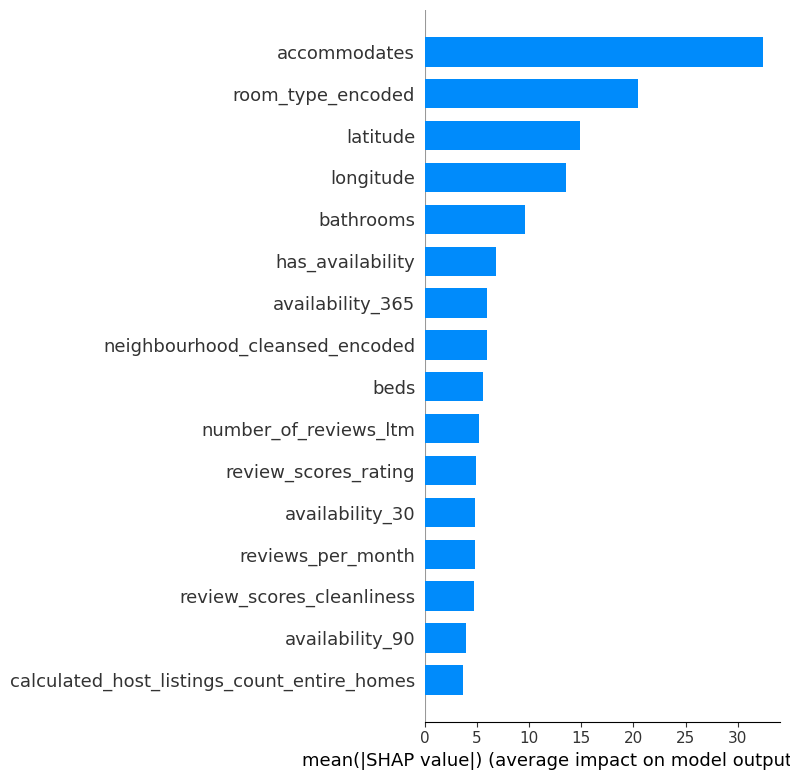

In [77]:
shap.summary_plot(shap_valuesL, X_testLX, plot_type="bar")

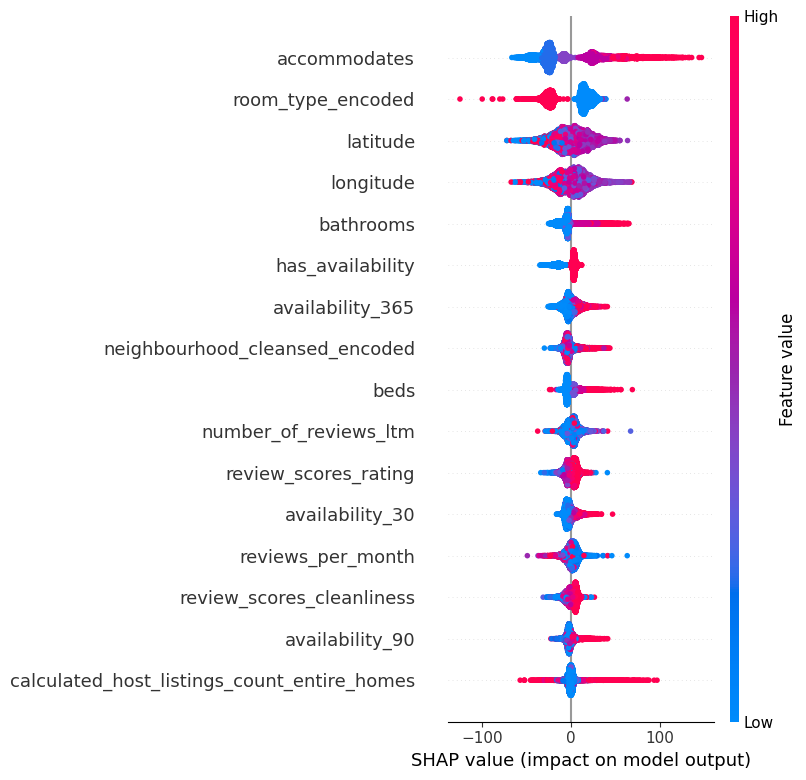

In [78]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_valuesL, features=X_testLX, feature_names=X_testLX.columns)

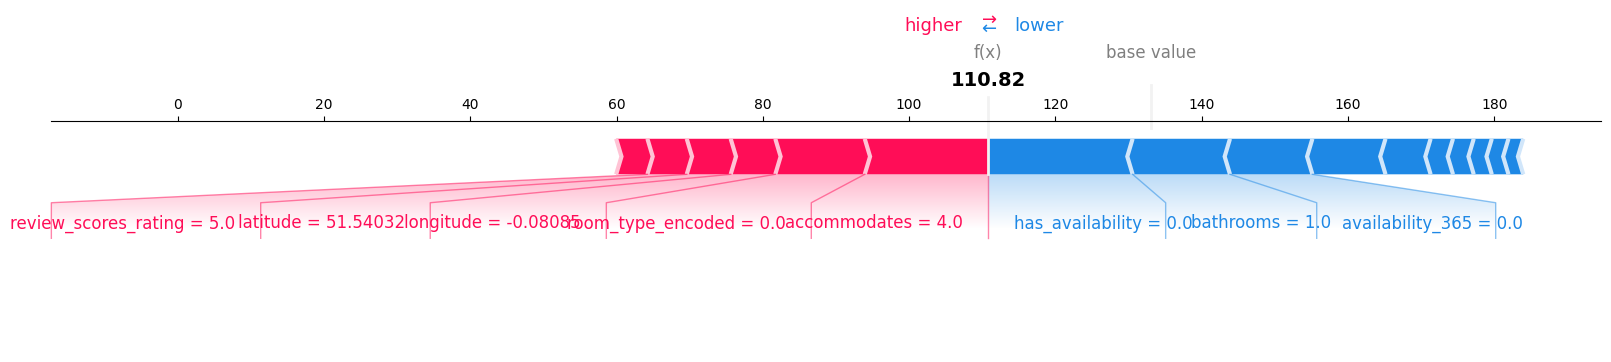

In [79]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.force_plot(explainerL.expected_value, shap_valuesL[60,:], X_testLX.iloc[60,:], matplotlib=True)

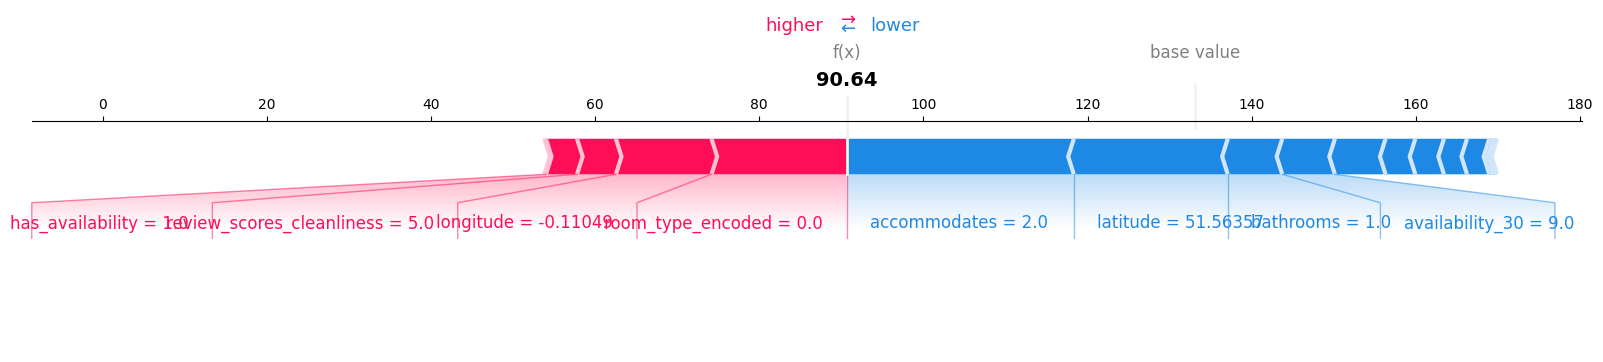

In [80]:
shap.force_plot(explainerL.expected_value, shap_valuesL[610,:], X_testLX.iloc[610,:], matplotlib=True)

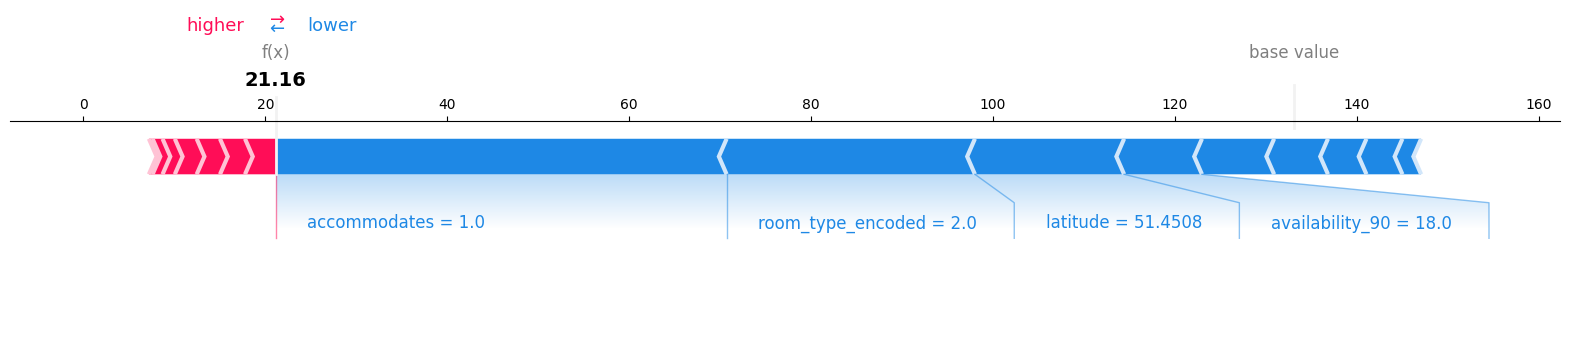

In [81]:
shap.force_plot(explainerL.expected_value, shap_valuesL[1200,:], X_testLX.iloc[1200,:], matplotlib=True)

## XGBoost - 10 cech

In [82]:
best_featuresLX = ['accommodates', 'room_type_encoded', 'latitude', 'longitude', 'bathrooms',
                   'review_scores_rating', 'availability_365', 'has_availability', 'beds',
                   'neighbourhood_cleansed_encoded']

In [83]:
dataL_subset = dataL.loc[:, best_featuresLX + ['price']]

X = dataL_subset.loc[:, best_featuresLX]
y = np.array(dataL_subset['price'])

X_trainLX, X_testLX, y_trainLX, y_testLX = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
modelLX = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
modelLX.fit(X_trainLX, y_trainLX)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
predictedLX = modelLX.predict(X_testLX)
list(zip(y_testLX[0:10], predictedLX[0:10]))

[(25.0, 62.592434),
 (30.0, 46.841354),
 (178.0, 218.68248),
 (155.0, 135.38225),
 (135.0, 164.23294),
 (191.0, 182.44434),
 (94.0, 78.772835),
 (35.0, 66.403595),
 (80.0, 100.14629),
 (36.0, 29.81664)]

In [86]:
px.histogram(y_testLX - predictedLX)

In [87]:
# rmse
np.sqrt(mean_squared_error(y_testLX, predictedLX))

52.5748618100591

In [88]:
# explained variance
explained_variance_score(y_testLX, predictedLX)

0.6682530091020036

In [89]:
# r2
LX10 =  r2_score(y_testLX, predictedLX)
print(LX10)

0.6682324223534576


### XAI - Shapley values

In [90]:
#Playing with Shapley values
explainerL = shap.TreeExplainer(modelLX)
shap_valuesL = explainerL.shap_values(X_testLX)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:22:31] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



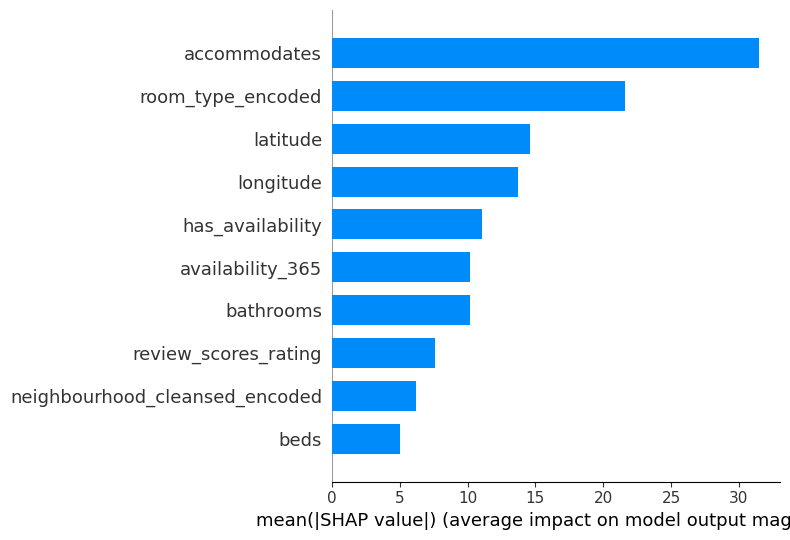

In [91]:
shap.summary_plot(shap_valuesL, X_testLX, plot_type="bar")

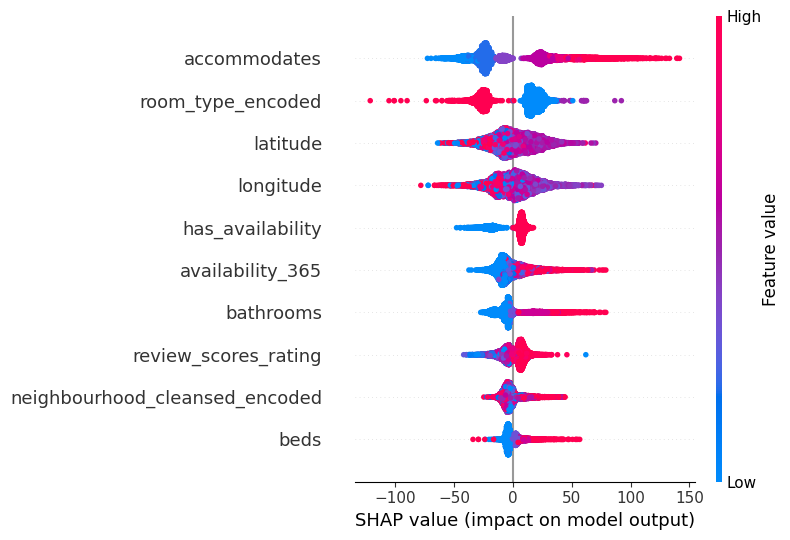

In [92]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_valuesL, features=X_testLX, feature_names=X_testLX.columns)

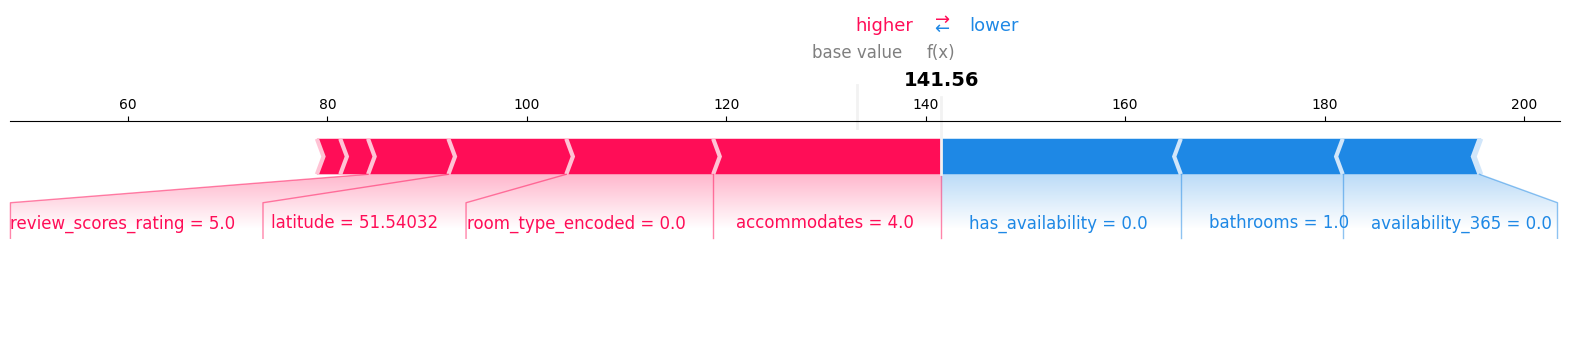

In [93]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.force_plot(explainerL.expected_value, shap_valuesL[60,:], X_testLX.iloc[60,:], matplotlib=True)

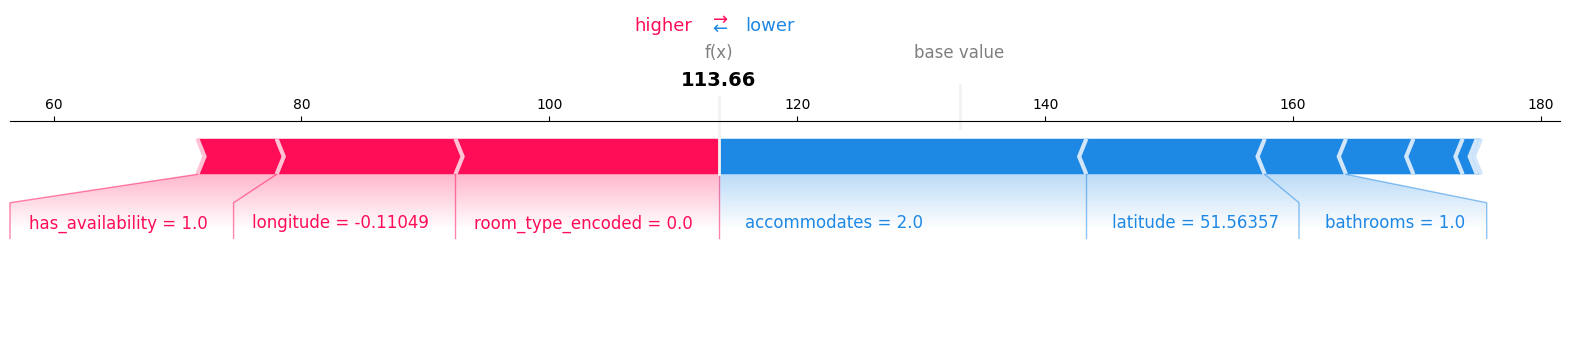

In [94]:
shap.force_plot(explainerL.expected_value, shap_valuesL[610,:], X_testLX.iloc[610,:], matplotlib=True)

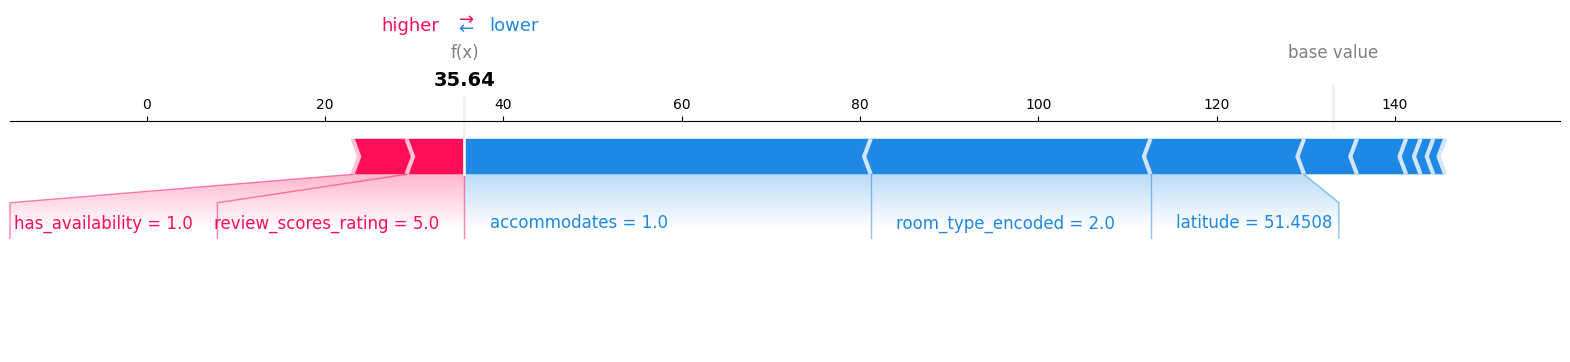

In [95]:
shap.force_plot(explainerL.expected_value, shap_valuesL[1200,:], X_testLX.iloc[1200,:], matplotlib=True)

## XGBoost - 5 cech

In [96]:
best_featuresLX = ['accommodates', 'room_type_encoded', 'latitude', 'longitude', 'bathrooms']

In [97]:
dataL_subset = dataL.loc[:, best_featuresLX + ['price']]

X = dataL_subset.loc[:, best_featuresLX]
y = np.array(dataL_subset['price'])

X_trainLX, X_testLX, y_trainLX, y_testLX = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
modelLX = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
modelLX.fit(X_trainLX, y_trainLX)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
predictedLX = modelLX.predict(X_testLX)
list(zip(y_testLX[0:10], predictedLX[0:10]))

[(25.0, 61.436092),
 (30.0, 50.51441),
 (178.0, 204.97783),
 (155.0, 113.75837),
 (135.0, 115.677666),
 (191.0, 169.03777),
 (94.0, 74.58943),
 (35.0, 51.848003),
 (80.0, 134.3176),
 (36.0, 51.38101)]

In [100]:
px.histogram(y_testLX - predictedLX)

In [101]:
# rmse
np.sqrt(mean_squared_error(y_testLX, predictedLX))

57.954338969712744

In [102]:
# explained variance
explained_variance_score(y_testLX, predictedLX)

0.5968685758575611

In [103]:
# r2
LX5 =  r2_score(y_testLX, predictedLX)
print(LX5)

0.5968658629562161


### XAI - Shapley values

In [104]:
#Playing with Shapley values
explainerL = shap.TreeExplainer(modelLX)
shap_valuesL = explainerL.shap_values(X_testLX)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:23:17] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



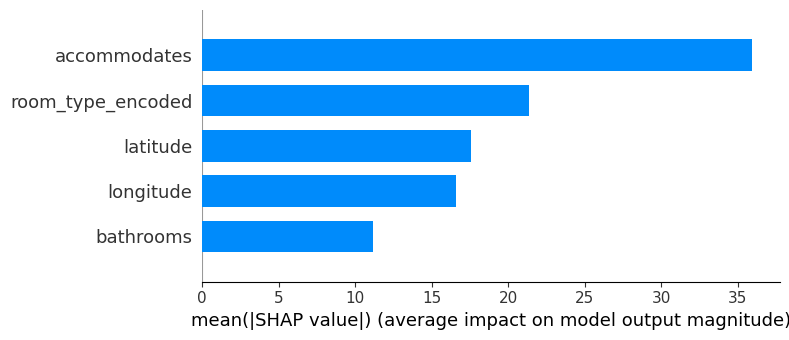

In [105]:
shap.summary_plot(shap_valuesL, X_testLX, plot_type="bar")

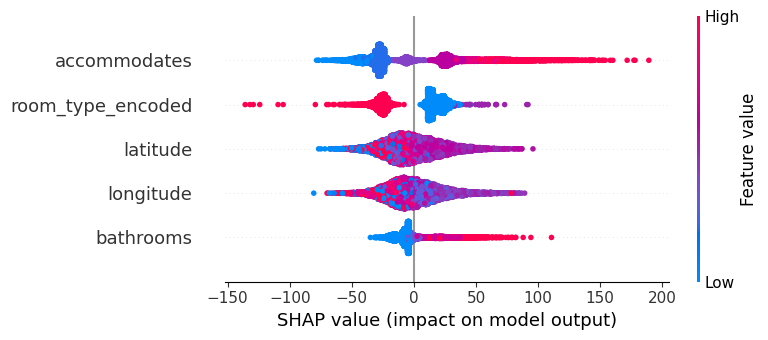

In [106]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_valuesL, features=X_testLX, feature_names=X_testLX.columns)

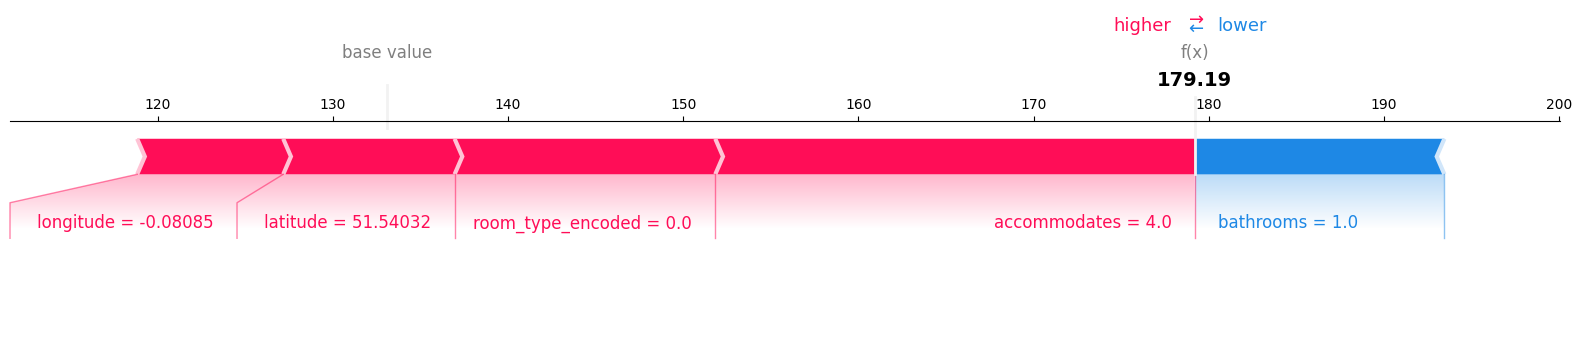

In [107]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.force_plot(explainerL.expected_value, shap_valuesL[60,:], X_testLX.iloc[60,:], matplotlib=True)

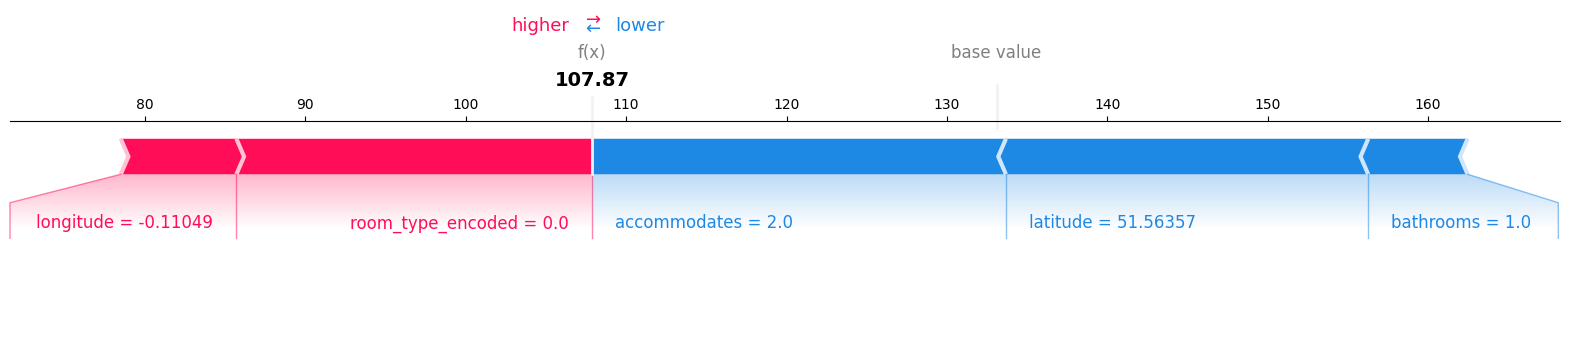

In [108]:
shap.force_plot(explainerL.expected_value, shap_valuesL[610,:], X_testLX.iloc[610,:], matplotlib=True)

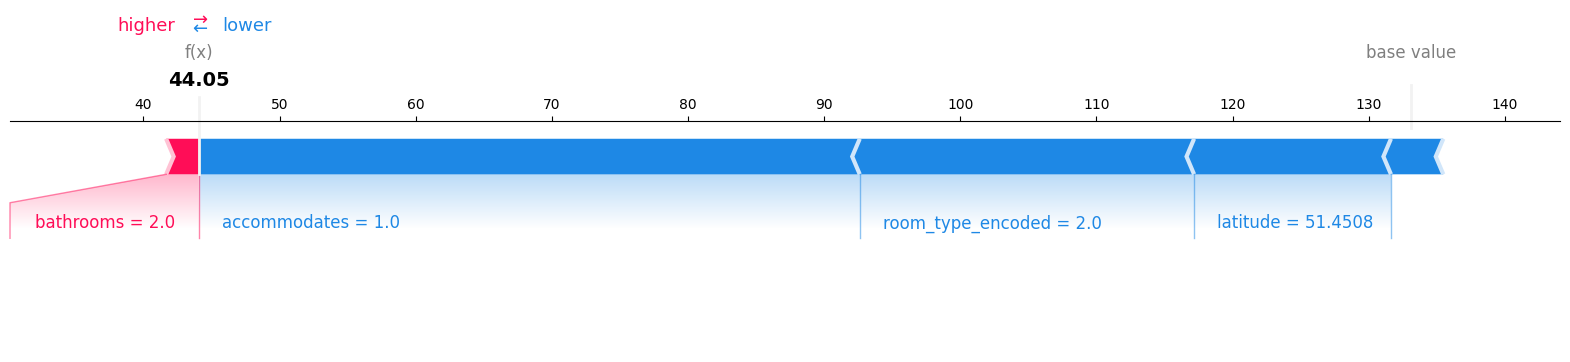

In [109]:
shap.force_plot(explainerL.expected_value, shap_valuesL[1200,:], X_testLX.iloc[1200,:], matplotlib=True)

## Regresja liniowa

**Użyte są cechy z XGBoost - 15 cech**

In [110]:
# Sprawdzenie czy wszystkie dane typów innych niż object nie mają wartości NaN
dataL.dtypes[dataL.dtypes != 'object'].isna().sum()

0

In [111]:
dataL.dtypes[(dataL.dtypes != 'object') & (dataL.dtypes != 'datetime64[ns]')]

id                                                int64
scrape_id                                         int64
host_id                                           int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
latitude                                        float64
longitude                                       float64
accommodates                                      int64
bathrooms                                       float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                  

In [112]:
# get all numeric - just string creation
" + ".join(all_num_feats)

'host_response_rate + host_acceptance_rate + host_is_superhost + host_listings_count + host_total_listings_count + host_has_profile_pic + latitude + longitude + accommodates + bathrooms + beds + minimum_nights + maximum_nights + minimum_minimum_nights + maximum_minimum_nights + minimum_maximum_nights + maximum_maximum_nights + minimum_nights_avg_ntm + maximum_nights_avg_ntm + has_availability + availability_30 + availability_60 + availability_90 + availability_365 + number_of_reviews + number_of_reviews_ltm + number_of_reviews_l30d + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + calculated_host_listings_count + calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + calculated_host_listings_count_shared_rooms + reviews_per_month + room_type_encoded + neighbourhood_cleansed_encoded'

In [113]:
model = smf.ols(
    '''
    price ~ host_response_rate +
    host_acceptance_rate +
    host_is_superhost +
    host_listings_count +
    host_total_listings_count +
    host_has_profile_pic +
    latitude +
    longitude +
    accommodates +
    bathrooms +
    beds +
    minimum_nights +
    maximum_nights +
    minimum_minimum_nights +
    maximum_minimum_nights +
    minimum_maximum_nights +
    maximum_maximum_nights +
    minimum_nights_avg_ntm +
    maximum_nights_avg_ntm +
    has_availability +
    availability_30 +
    availability_60 +
    availability_90 +
    availability_365 +
    number_of_reviews +
    number_of_reviews_ltm +
    number_of_reviews_l30d +
    review_scores_rating +
    review_scores_accuracy +
    review_scores_cleanliness +
    review_scores_checkin +
    review_scores_communication +
    review_scores_location +
    review_scores_value +
    instant_bookable +
    calculated_host_listings_count +
    calculated_host_listings_count_entire_homes +
    calculated_host_listings_count_private_rooms +
    calculated_host_listings_count_shared_rooms +
    reviews_per_month +
    room_type_encoded
    ''', data = dataL).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1695.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:24:21   Log-Likelihood:            -3.3704e+05
No. Observations:               60633   AIC:                         6.742e+05
Df Residuals:                   60591   BIC:                         6.745e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [114]:
dataL_scaled = dataL.copy()
scaler = StandardScaler()
dataL_scaled[all_num_feats] = scaler.fit_transform(dataL_scaled[all_num_feats])
dataL_scaled[all_num_feats]

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    0.46                 -0.48              -0.50   
1                   -0.12                 -0.03              -0.50   
2                    0.46                  0.75               2.00   
3                   -0.12                  0.75              -0.50   
4                   -0.26                  0.01              -0.50   
...                   ...                   ...                ...   
91768               -0.26                  0.60              -0.50   
91771                0.39                  0.01              -0.50   
91774                0.46                  0.75              -0.50   
91775                0.46                  0.51              -0.50   
91777                0.46                  0.70              -0.50   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                    -0.17                      -0.15                  0.15   
1                    -0.16                      -0.15                  0.15   
2                    -0.16                      -0.14                  0.15   
3                    -0.17                      -0.15                  0.15   
4                    -0.15                      -0.13                  0.15   
...                    ...                        ...                   ...   
91768                -0.13                      -0.12                  0.15   
91771                 0.47                       0.28                  0.15   
91774                -0.12                      -0.10                  0.15   
91775                -0.16                      -0.15                  0.15   
91777                -0.13                      -0.13                  0.15   

       latitude  longitude  accommodates  bathrooms  beds  minimum_nights  \
0          0.51       2.09         -1.15      -0.51 -0.65           -0.15   
1         -0.92      -1.99         -0.61      -0.51 -0.65           -0.15   
2          1.56      -0.38         -0.61      -0.51 -0.65           -0.05   
3          0.11      -0.74         -0.07       0.36 -0.65            0.45   
4          1.19       0.15          0.48      -0.51 -0.65           -0.20   
...         ...        ...           ...        ...   ...             ...   
91768      0.07      -0.62          0.48      -0.51  0.20           -0.20   
91771      0.22      -0.84          0.48      -0.51  0.20           -0.15   
91774     -0.59       0.12          1.57      -0.51  1.06           -0.10   
91775     -0.63      -0.54          2.11       0.36  1.91           -0.20   
91777      0.24       0.30         -0.07      -0.51  0.20           -0.10   

       maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0               -0.90                   -0.14                   -0.25   
1               -1.07                   -0.14                   -0.25   
2               -0.33                   -0.03                   -0.19   
3               -0.33                    0.50                    0.13   
4               -0.98                   -0.19                   -0.29   
...               ...                     ...                     ...   
91768           -0.33                   -0.19                   -0.19   
91771           -0.73                   -0.14                   -0.16   
91774           -1.07                   -0.08                   -0.10   
91775           -0.33                   -0.19                   -0.29   
91777           -0.33                   -0.19                   -0.22   

       minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                       -0.01                   -0.02                   -0.19   
1                       -0.01                   -0.02                   -0.19   
2                       -0.01                   -0.02                   -0.11   
3                       -0.01                   -0.02                    0.28   
4         

In [115]:
dataL_subset = dataL_scaled.loc[:, all_num_feats + ['price']]

Xg = dataL_subset.loc[:,all_num_feats]
yg = np.array(dataL_subset.price)

X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2)

In [116]:
# model z innej biblioteki - statsmodels.api, w tym przypadku trzeba dodać kolumnę stałych - add_constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:24:21   Log-Likelihood:            -2.6907e+05
No. Observations:               48506   AIC:                         5.382e+05
Df Residuals:                   48463   BIC:                         5.386e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [117]:
all_feats = all_num_feats.copy()

In [118]:
# usunięcie cech
'''
to_remove = ['minimum_nights_avg_ntm', 'availability_60', 'host_response_rate', 'calculated_host_listings_count_entire_homes',
             'number_of_reviews_ltm', 'host_listings_count', 'host_total_listings_count', 'beds']

variablesL = list(filter(lambda x: x not in to_remove, all_num_feats))
'''

# cechy wzięte z XGBoost - 15 cech dla Londynu

variablesL = ['accommodates', 'room_type_encoded', 'latitude', 'longitude', 'bathrooms',
              'review_scores_rating', 'availability_365', 'has_availability', 'beds',
              'neighbourhood_cleansed_encoded', 'availability_30', 'review_scores_cleanliness',
              'reviews_per_month', 'calculated_host_listings_count_entire_homes',
              'number_of_reviews_ltm', 'availability_90']

dataL_subset = dataL_scaled.loc[:, variablesL + ['price']]

Xg = dataL_subset.loc[:,variablesL]
yg = np.array(dataL_subset.price)

X_train, X_test, y_train, y_test = train_test_split(Xg, yg, test_size=0.2)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     3310.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:24:21   Log-Likelihood:            -2.7023e+05
No. Observations:               48506   AIC:                         5.405e+05
Df Residuals:                   48489   BIC:                         5.406e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### Prediction

In [119]:
# predykcja na zbiorze testowym
y_pred = model.predict(X_test)

In [120]:
X_test.reset_index(drop=True, inplace=True)

In [121]:
dataL_model_preds = pd.concat([X_test, pd.Series(y_test).rename('price'), model.predict(X_test).rename('predict')], axis = 1)

In [122]:
dataL_model_preds.tail(3)

const  accommodates  room_type_encoded  latitude  longitude  bathrooms  \
12124   1.00          0.48              -0.75      0.48      -0.12      -0.51   
12125   1.00          0.48              -0.75     -1.08      -0.75      -0.51   
12126   1.00         -0.07               1.32     -1.91      -0.31       0.36   

       review_scores_rating  availability_365  has_availability  beds  \
12124                 -1.94             -0.90              0.60  1.91   
12125                  0.64             -0.90             -1.66  0.20   
12126                  0.64              1.10              0.60  1.06   

       neighbourhood_cleansed_encoded  availability_30  \
12124                           -1.41            -0.86   
12125                            1.27            -0.86   
12126                            0.45             1.74   

       review_scores_cleanliness  reviews_per_month  \
12124                      -0.56              -0.36   
12125                       0.07              -0.88   
12126                       0.68              -0.20   

       calculated_host_listings_count_entire_homes  number_of_reviews_ltm  \
12124                                        -0.06                  -0.24   
12125                                        -0.25                  -0.64   
12126                                        -0.28                  -0.54   

       availability_90  price  predict  
12124            -0.99 175.00   143.76  
12125            -0.99  39.00   145.45  
12126             1.47  70.00   122.99

### RMSE

In [123]:
# na zbiorze treningowym
np.sqrt(model.mse_resid)

63.57448248883763

In [124]:
# na zbiorze testowym
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

64.41833316736563

### Residuals

In [125]:
# na zbiorze testowym
dataL_model_preds['residuals'] = dataL_model_preds['price'] - dataL_model_preds['predict']
dataL_model_preds.head(3)

const  accommodates  room_type_encoded  latitude  longitude  bathrooms  \
0   1.00          0.48              -0.75     -2.18       0.24      -0.51   
1   1.00          1.57              -0.75      0.96      -0.69      -0.51   
2   1.00         -0.61               1.32      1.70      -0.57      -0.51   

   review_scores_rating  availability_365  has_availability  beds  \
0                 -0.21              1.65              0.60  0.20   
1                  0.08              0.14              0.60  1.06   
2                  0.64              1.83              0.60 -0.65   

   neighbourhood_cleansed_encoded  availability_30  review_scores_cleanliness  \
0                           -1.20             0.74                       0.68   
1                           -1.41             0.04                      -0.19   
2                           -1.82             2.03                       0.68   

   reviews_per_month  calculated_host_listings_count_entire_homes  \
0               3.32                                        -0.25   
1              -0.68                                        -0.25   
2              -0.89                                        -0.28   

   number_of_reviews_ltm  availability_90  price  predict  residuals  
0                   0.26             1.01 103.00   154.93     -51.93  
1                   0.46             0.41 225.00   201.75      23.25  
2                  -0.64             1.56 400.00    94.25     305.75

In [126]:
px.histogram(dataL_model_preds['residuals'])

In [127]:
dataL_model_preds = dataL_model_preds[(dataL_model_preds['predict'] < 500)]

Text(0, 0.5, 'Residuals')

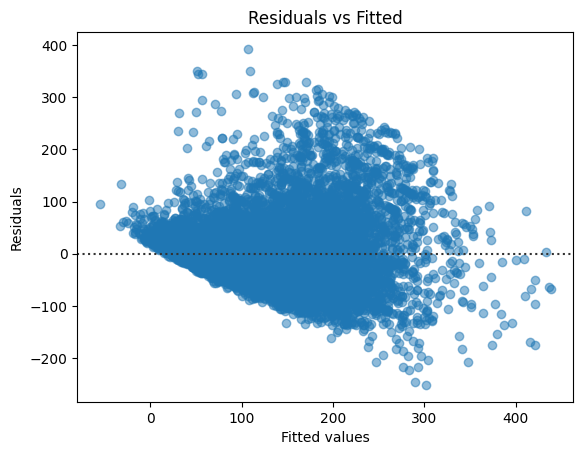

In [128]:
#  Residual plot
plot = sns.residplot(x=dataL_model_preds['predict'], y=dataL_model_preds['residuals'], data=dataL_model_preds,
                     scatter_kws={'alpha': 0.5})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

Dla 30 cech jest około 0.730  
Dla 15 cech jest 0.701 <- **zalecane**?  
Dla 10 cech jest 0.669  
Dla 5 cech jest 0.597  
(cechy wzięte z Shapleya)

## Lasso

(0.0016701560628837255,
 89.92698845409679,
 -32.092782511756376,
 40.271522849407816)

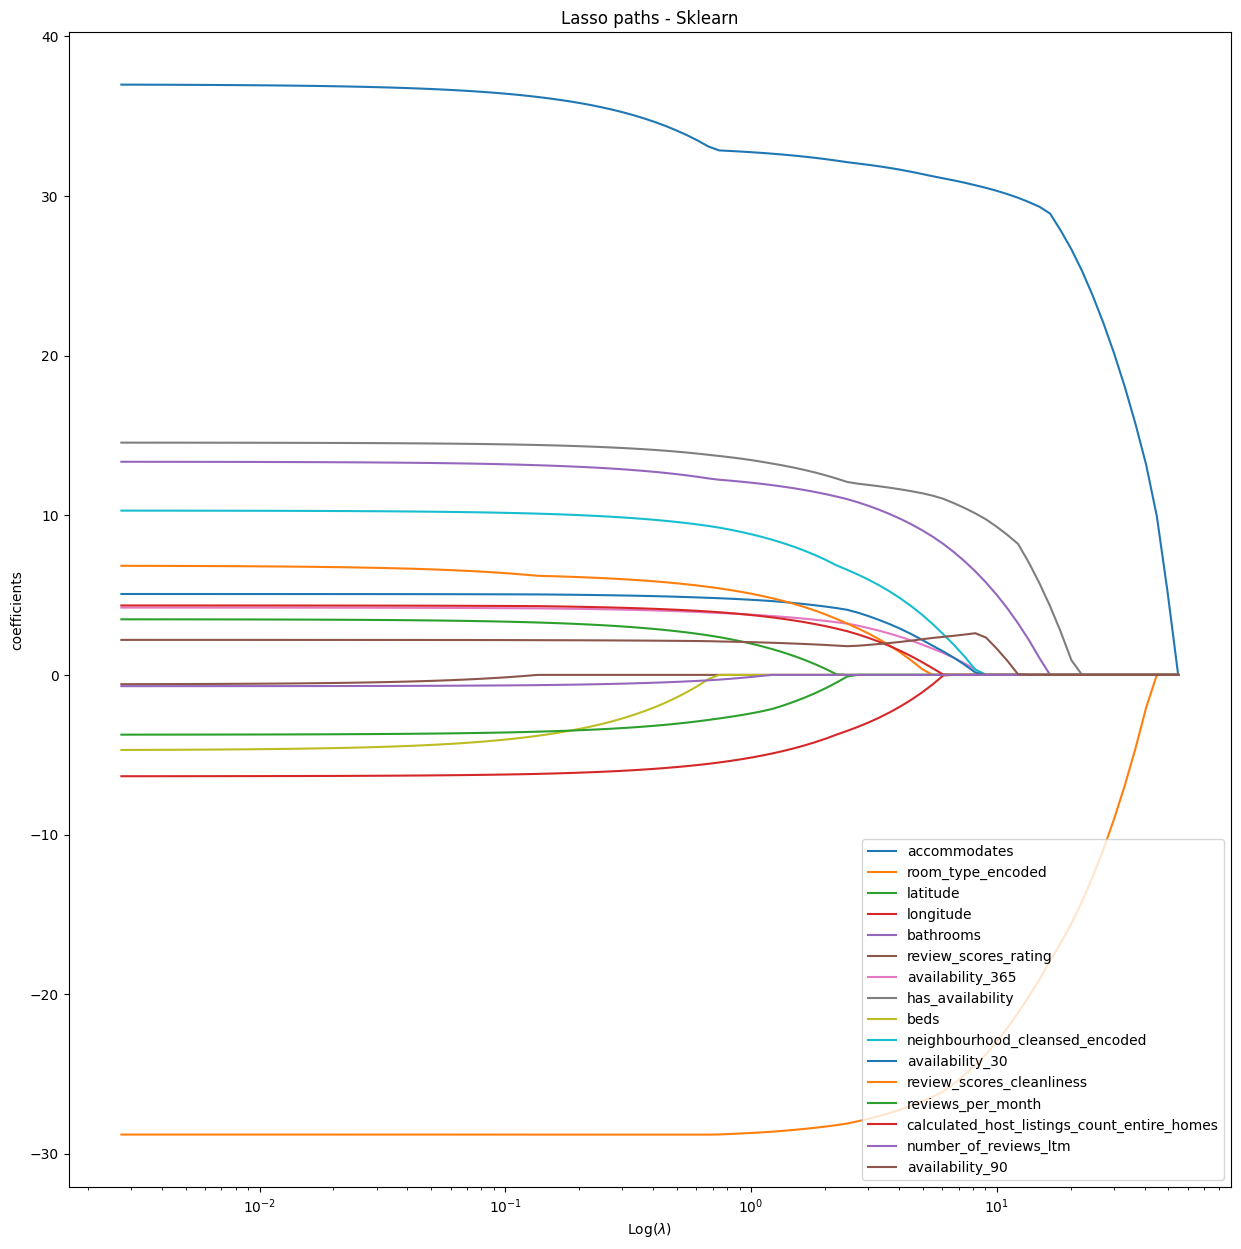

In [130]:
# Lasso

X = dataL_subset.loc[:,variablesL]
y = np.array(dataL_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# Display results
plt.figure(figsize = (15,15))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variablesL[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

# Wyniki XGBoost w zal. od l. cech Londyn

Dla 30 cech jest około 0.730  
Dla 15 cech 0.707 <- **zalecane**?  
Dla 10 cech 0.669  
Dla  5 cech 0.597  
(wzięte z Shapleya)

# Toronto

## Obróbka danych

In [131]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19994 non-null  int64  
 1   listing_url                                   19994 non-null  object 
 2   scrape_id                                     19994 non-null  int64  
 3   last_scraped                                  19994 non-null  object 
 4   source                                        19994 non-null  object 
 5   name                                          19994 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         11269 non-null  object 
 8   picture_url                                   19994 non-null  object 
 9   host_id                                       19994 non-null 

In [132]:
dataT.head(3)

id                                       listing_url  \
0  1002736951366032648  https://www.airbnb.com/rooms/1002736951366032648   
1   716133555965651038   https://www.airbnb.com/rooms/716133555965651038   
2             27278791             https://www.airbnb.com/rooms/27278791   

        scrape_id last_scraped       source  \
0  20231212054246   2023-12-12  city scrape   
1  20231212054246   2023-12-12  city scrape   
2  20231212054246   2023-12-12  city scrape   

                                                name  description  \
0  Bungalow in Toronto · ★New · 1 bedroom · 1 bed...          NaN   
1  Townhouse in North York · 1 bedroom · 2 beds ·...          NaN   
2  Home in Toronto · ★4.91 · 1 bedroom · 2 beds ·...          NaN   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  This house is on a very quiet street of the Ce...   

                                         picture_url    host_id  \
0  https://a0.muscache.com/pictures/8c0a277f-2ce5...  273730029   
1  https://a0.muscache.com/pictures/miso/Hosting-...  474878080   
2  https://a0.muscache.com/pictures/miso/Hosting-...  141166875   

                                      host_url      host_name  host_since  \
0  https://www.airbnb.com/users/show/273730029  Tran Thien Ly  2019-07-05   
1  https://www.airbnb.com/users/show/474878080        Huu-Hoa  2022-08-13   
2  https://www.airbnb.com/users/show/141166875         Andrew  2017-07-18   

     host_location                                         host_about  \
0  Toronto, Canada  "The most beautiful things in life are not thi...   
1  Toronto, Canada                                                NaN   
2  Toronto, Canada                                                NaN   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour               100%                  98%   
1     within an hour               100%                  95%   
2     within an hour               100%                  99%   

  host_is_superhost                                 host_thumbnail_url  \
0               NaN  https://a0.muscache.com/im/pictures/user/fe5d9...   
1                 t  https://a0.muscache.com/im/pictures/user/ca5fb...   
2                 t  https://a0.muscache.com/im/pictures/user/247f8...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/fe5d9...          Westmount   
1  https://a0.muscache.com/im/pictures/user/ca5fb...                NaN   
2  https://a0.muscache.com/im/pictures/user/247f8...        The Westway   

   host_listings_count  host_total_listings_count  host_verifications  \
0                 5.00                       6.00  ['email', 'phone']   
1                 4.00                       5.00  ['email', 'phone']   
2                 3.00                       7.00  ['email', 'phone']   

  host_has_profile_pic host_identity_verified             neighbourhood  \
0                    t                      t                       NaN   
1                    t                      t                       NaN   
2                    t                      t  Toronto, Ontario, Canada   

          neighbourhood_cleansed  neighbourhood_group_cleansed  latitude  \
0       Humber Heights-Westmount                           NaN     43.69   
1           Downsview-Roding-CFB                           NaN     43.74   
2  Kingsview Village-The Westway                           NaN     43.70   

   longitude              property_type     room_type  accommodates  \
0     -79.52   Private room in bungalow  Private room             2   
1     -79.47  Private room in townhouse  Private room             3   
2     -79.54       Private room in home  Private room             4   

   bathrooms  bathrooms_text  bedrooms  beds amenities    price  \
0        NaN          1 bath       NaN  1.00   

In [133]:
# Procentowy wynik wartości NaN w kolumnach
dataT1 = dataT.isna().sum() > 0
dataT.loc[:, dataT1].isna().sum().sort_values(ascending=False) / len(dataT) * 100

description                    100.00
bathrooms                      100.00
calendar_updated               100.00
neighbourhood_group_cleansed   100.00
bedrooms                        99.98
host_neighbourhood              57.47
license                         53.67
host_about                      52.22
neighborhood_overview           43.64
neighbourhood                   43.63
host_response_time              32.59
host_response_rate              32.59
host_acceptance_rate            26.98
reviews_per_month               25.70
last_review                     25.70
first_review                    25.70
review_scores_checkin           25.67
review_scores_location          25.67
review_scores_accuracy          25.66
review_scores_value             25.66
review_scores_communication     25.66
review_scores_cleanliness       25.65
review_scores_rating            25.65
host_location                   24.81
has_availability                 5.13
price                            5.13
host_is_supe

In [134]:
# usuwanie niepotrzebnych kolumn z największymi brakami w danych
dataT.drop([
    'description',
    'neighbourhood_group_cleansed', # zamiast tego można użyć neighbourhood_cleansed
    'host_neighbourhood',
    'calendar_updated',
    'bedrooms', # nie ma skąd wziąć tej informacji
    'amenities' # puste tabele
    ], axis=1, inplace=True)

In [135]:
# bathrooms_text na bathrooms
dataT['bathrooms_text'].unique()

array(['1 bath', '1 private bath', '1 shared bath', '1.5 baths',
       '2 shared baths', '2.5 shared baths', '2 baths', '0 baths',
       '1.5 shared baths', '2.5 baths', '4 baths', '3.5 baths',
       '3 shared baths', '3 baths', '5.5 baths', '5 baths',
       'Private half-bath', 'Shared half-bath', '0 shared baths',
       '4.5 baths', nan, 'Half-bath', '6.5 baths', '6 baths',
       '3.5 shared baths', '8 baths', '7 baths', '4 shared baths',
       '8.5 baths', '4.5 shared baths', '10.5 baths'], dtype=object)

In [136]:
dataT['bathrooms'] = dataT['bathrooms_text'].str.extract('([\d.]+)').astype(float)
dataT['bathrooms'] = np.where(dataT['bathrooms_text'] == 'Half-bath', 0.5, dataT['bathrooms'])

In [137]:
# zakładamy że jak nie ma wprowadzonej to jest 1
dataT['bathrooms'].mode()

0   1.00
Name: bathrooms, dtype: float64

In [138]:
dataT['bathrooms'].fillna(1, inplace=True)
dataT['bathrooms'].unique()

array([ 1. ,  1.5,  2. ,  2.5,  0. ,  4. ,  3.5,  3. ,  5.5,  5. ,  4.5,
        0.5,  6.5,  6. ,  8. ,  7. ,  8.5, 10.5])

In [139]:
# zamiana w kolumnach t/f na 1/0 zakładając, że jeśli NaN to f

dataT[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].head(3)

host_is_superhost host_has_profile_pic host_identity_verified  \
0               NaN                    t                      t   
1                 t                    t                      t   
2                 t                    t                      t   

  has_availability instant_bookable  
0                t                f  
1                t                t  
2                t                f

In [140]:
mapping_func = {'t' : 1, 'f' : 0}
kolumnytf = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
dataT[kolumnytf] = dataT[kolumnytf].applymap(lambda x: mapping_func.get(x, 0)).astype(bool)

In [141]:
# wartości procentowe na ułamki
dataT[['host_response_rate', 'host_acceptance_rate']].head(3)

host_response_rate host_acceptance_rate
0               100%                  98%
1               100%                  95%
2               100%                  99%

In [142]:
kolumnypr = ['host_response_rate', 'host_acceptance_rate']
dataT[kolumnypr] = dataT[kolumnypr].apply(lambda x: x.str.replace('%','').astype(float) / 100)

In [143]:
dataT[kolumnypr].isna().sum() / len(dataT[kolumnypr]) * 100

host_response_rate     32.59
host_acceptance_rate   26.98
dtype: float64

In [144]:
# Dane zostaną zamienione wartościami średnimi
dataT[kolumnypr].describe()

host_response_rate  host_acceptance_rate
count            13477.00              14599.00
mean                 0.95                  0.85
std                  0.17                  0.24
min                  0.00                  0.00
25%                  1.00                  0.82
50%                  1.00                  0.97
75%                  1.00                  1.00
max                  1.00                  1.00

In [145]:
dataT['host_response_rate'].fillna(round(dataT['host_response_rate'].mean(), 2), inplace=True)
dataT['host_acceptance_rate'].fillna(round(dataT['host_acceptance_rate'].mean(), 2), inplace=True)

In [146]:
# daty
kolumnydat = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']
dataT[kolumnydat].head(3)

last_scraped  host_since calendar_last_scraped first_review last_review
0   2023-12-12  2019-07-05            2023-12-12          NaN         NaN
1   2023-12-12  2022-08-13            2023-12-12   2022-11-24  2022-11-24
2   2023-12-12  2017-07-18            2023-12-12   2018-10-19  2023-12-11

In [147]:
dataT[kolumnydat] = dataT[kolumnydat].apply(pd.to_datetime)

In [148]:
# cena
dataT['price'] = dataT['price'].str.replace('[$,]','').astype(float)

<ipython-input-148-8ccdadc2032d>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [149]:
dataT['price'].describe()

count   18968.00
mean      175.75
std       311.45
min        12.00
25%        75.00
50%       120.00
75%       196.00
max     12400.00
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

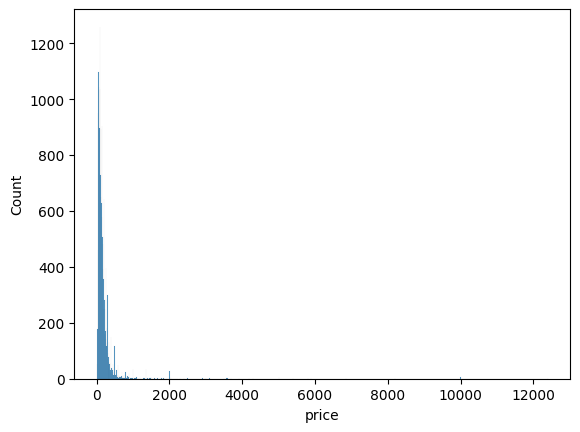

In [150]:
sns.histplot(x = dataT['price'])

In [151]:
filtered = dataT[~np.isnan(dataT['price'])]['price']
perc = np.percentile(filtered, 95)
print('95% wartości price znajduje się w przedziale do: {0:.2f}'.format(perc))
dataT = dataT[dataT['price'] < perc]

95% wartości price znajduje się w przedziale do: 425.00


<Axes: xlabel='price', ylabel='Count'>

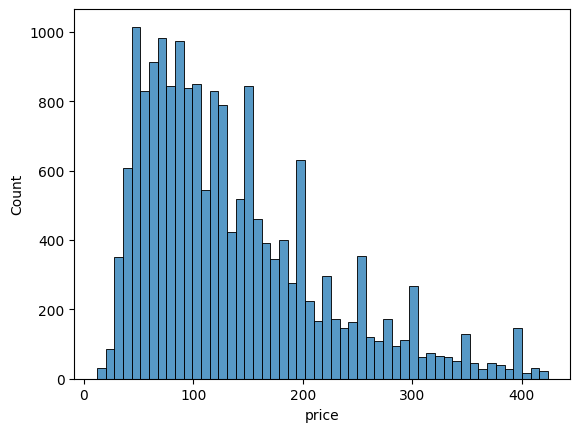

In [152]:
sns.histplot(x = dataT['price'])

In [153]:
dataT.head(3)

id                                       listing_url  \
0  1002736951366032648  https://www.airbnb.com/rooms/1002736951366032648   
1   716133555965651038   https://www.airbnb.com/rooms/716133555965651038   
2             27278791             https://www.airbnb.com/rooms/27278791   

        scrape_id last_scraped       source  \
0  20231212054246   2023-12-12  city scrape   
1  20231212054246   2023-12-12  city scrape   
2  20231212054246   2023-12-12  city scrape   

                                                name  \
0  Bungalow in Toronto · ★New · 1 bedroom · 1 bed...   
1  Townhouse in North York · 1 bedroom · 2 beds ·...   
2  Home in Toronto · ★4.91 · 1 bedroom · 2 beds ·...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  This house is on a very quiet street of the Ce...   

                                         picture_url    host_id  \
0  https://a0.muscache.com/pictures/8c0a277f-2ce5...  273730029   
1  https://a0.muscache.com/pictures/miso/Hosting-...  474878080   
2  https://a0.muscache.com/pictures/miso/Hosting-...  141166875   

                                      host_url      host_name host_since  \
0  https://www.airbnb.com/users/show/273730029  Tran Thien Ly 2019-07-05   
1  https://www.airbnb.com/users/show/474878080        Huu-Hoa 2022-08-13   
2  https://www.airbnb.com/users/show/141166875         Andrew 2017-07-18   

     host_location                                         host_about  \
0  Toronto, Canada  "The most beautiful things in life are not thi...   
1  Toronto, Canada                                                NaN   
2  Toronto, Canada                                                NaN   

  host_response_time  host_response_rate  host_acceptance_rate  \
0     within an hour                1.00                  0.98   
1     within an hour                1.00                  0.95   
2     within an hour                1.00                  0.99   

   host_is_superhost                                 host_thumbnail_url  \
0              False  https://a0.muscache.com/im/pictures/user/fe5d9...   
1               True  https://a0.muscache.com/im/pictures/user/ca5fb...   
2               True  https://a0.muscache.com/im/pictures/user/247f8...   

                                    host_picture_url  host_listings_count  \
0  https://a0.muscache.com/im/pictures/user/fe5d9...                 5.00   
1  https://a0.muscache.com/im/pictures/user/ca5fb...                 4.00   
2  https://a0.muscache.com/im/pictures/user/247f8...                 3.00   

   host_total_listings_count  host_verifications  host_has_profile_pic  \
0                       6.00  ['email', 'phone']                  True   
1                       5.00  ['email', 'phone']                  True   
2                       7.00  ['email', 'phone']                  True   

   host_identity_verified             neighbourhood  \
0                    True                       NaN   
1                    True                       NaN   
2                    True  Toronto, Ontario, Canada   

          neighbourhood_cleansed  latitude  longitude  \
0       Humber Heights-Westmount     43.69     -79.52   
1           Downsview-Roding-CFB     43.74     -79.47   
2  Kingsview Village-The Westway     43.70     -79.54   

               property_type     room_type  accommodates  bathrooms  \
0   Private room in bungalow  Private room             2       1.00   
1  Private room in townhouse  Private room             3       1.00   
2       Private room in home  Private room             4       1.00   

   bathrooms_text  beds  price  minimum_nights  maximum_nights  \
0          1 bath  1.00  72.00              28             365   
1  1 private bath  2.00 110.00              28             365   
2  1 private bath  2.00 104.00               1              89   

   minimum_minimum_nights  maximum_mi

In [154]:
dataT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18012 entries, 0 to 19993
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            18012 non-null  int64         
 1   listing_url                                   18012 non-null  object        
 2   scrape_id                                     18012 non-null  int64         
 3   last_scraped                                  18012 non-null  datetime64[ns]
 4   source                                        18012 non-null  object        
 5   name                                          18012 non-null  object        
 6   neighborhood_overview                         10337 non-null  object        
 7   picture_url                                   18012 non-null  object        
 8   host_id                                       18012 non-null  int6

In [155]:
dataT.loc[:, dataT1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataT) * 100

reviews_per_month             23.42
review_scores_checkin         23.37
review_scores_rating          23.37
review_scores_accuracy        23.37
review_scores_cleanliness     23.37
review_scores_communication   23.37
review_scores_location        23.37
review_scores_value           23.37
beds                           0.89
host_response_rate             0.00
host_acceptance_rate           0.00
host_listings_count            0.00
host_total_listings_count      0.00
bathrooms                      0.00
price                          0.00
dtype: float64

In [156]:
dataT['reviews_per_month'].describe()

count   13793.00
mean        1.42
std         1.77
min         0.01
25%         0.22
50%         0.66
75%         2.04
max        13.40
Name: reviews_per_month, dtype: float64

In [157]:
# średnia 1.4 a max 13 -> najpewniej są wartości odstające

In [158]:
dataH = dataT[(dataT['reviews_per_month'] < 1.5)]['reviews_per_month']

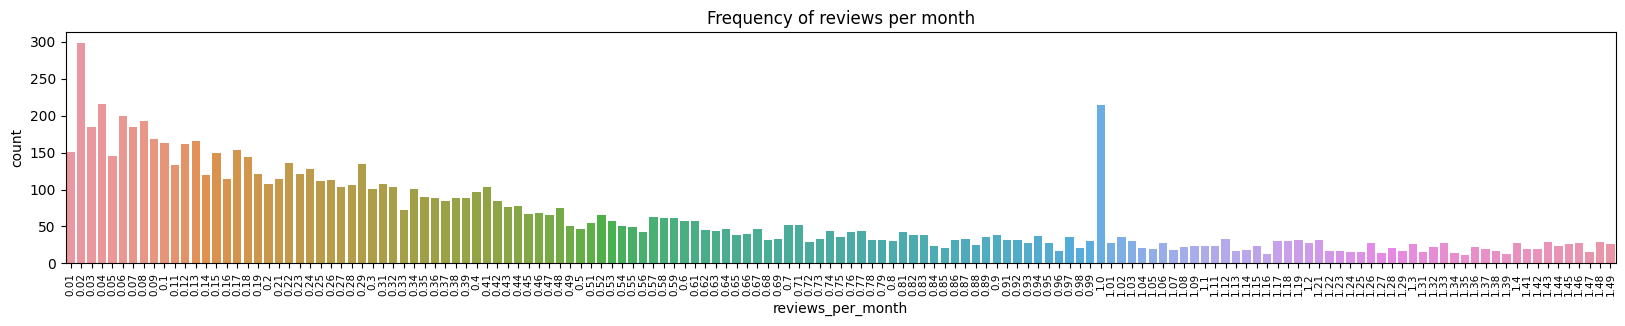

In [159]:
plt.figure(figsize=(20,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90, size=7.5)
plt.show()

In [160]:
dataH = dataT[(dataT['reviews_per_month'] < 15) & (dataT['reviews_per_month'] > 9)]['reviews_per_month']

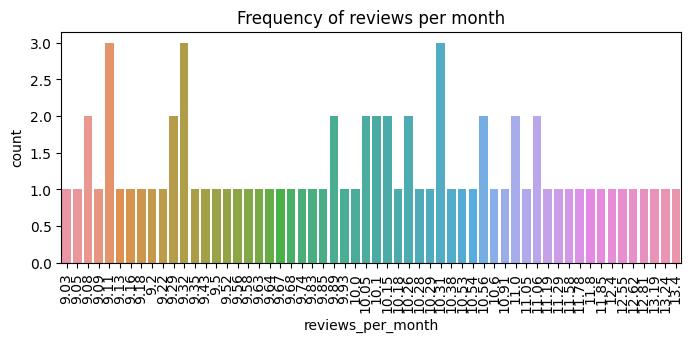

In [161]:
plt.figure(figsize=(8,3))
sns.countplot(x = dataH)
plt.title('Frequency of reviews per month')
plt.xticks(rotation=90)
plt.show()

In [162]:
# Trzeba wyfiltrować wartości NaN by policzyć percentyle - powyżej 95% wyniki można odrzucić
filtered = dataT[~np.isnan(dataT['reviews_per_month'])]['reviews_per_month']
perc = np.percentile(filtered, 95)
print('95% wartości reviews_per_month znajduje się w przedziale do: {0:.2f}'.format(perc))

95% wartości reviews_per_month znajduje się w przedziale do: 5.12


In [163]:
dataT['reviews_per_month'].isna().sum()

4219

In [164]:
filtered.describe()

count   13793.00
mean        1.42
std         1.77
min         0.01
25%         0.22
50%         0.66
75%         2.04
max        13.40
Name: reviews_per_month, dtype: float64

In [165]:
filtered = filtered[filtered < perc]

In [166]:
# można odrzucić takie outliery
dataT = dataT[dataT['reviews_per_month'] < perc]

In [167]:
dataT['reviews_per_month'].describe()

count   13102.00
mean        1.14
std         1.24
min         0.01
25%         0.21
50%         0.59
75%         1.76
max         5.11
Name: reviews_per_month, dtype: float64

In [168]:
dataT.loc[:, dataT1].select_dtypes(include='number').isna().sum().sort_values(ascending=False) / len(dataT) * 100

beds                          0.77
review_scores_checkin         0.01
host_response_rate            0.00
host_acceptance_rate          0.00
host_listings_count           0.00
host_total_listings_count     0.00
bathrooms                     0.00
price                         0.00
review_scores_rating          0.00
review_scores_accuracy        0.00
review_scores_cleanliness     0.00
review_scores_communication   0.00
review_scores_location        0.00
review_scores_value           0.00
reviews_per_month             0.00
dtype: float64

In [169]:
# beds - jeśli nie ma to zakładamy modę
dataT['beds'].unique()

array([ 2., nan,  1.,  3.,  5.,  4.,  6.,  7.,  8., 12.,  9., 10.])

In [170]:
dataT['beds'].mode()

0   1.00
Name: beds, dtype: float64

In [171]:
dataT['beds'].fillna(1, inplace=True)

<ipython-input-171-1c4d01bd83d1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
dataT['beds'].isna().sum()

0

In [173]:
# ostatnia wartość nan
dataT['review_scores_checkin'].describe()

count   13101.00
mean        4.85
std         0.35
min         0.00
25%         4.83
50%         4.96
75%         5.00
max         5.00
Name: review_scores_checkin, dtype: float64

In [174]:
# wypełniamy średnią
dataT['review_scores_checkin'].fillna(dataT['review_scores_checkin'].mean(), inplace=True)

In [175]:
# sprawdzenie czy są jakiekolwiek wartości nan w typach numerycznych
dataT.select_dtypes(include='number').isna().sum().sum()

0

In [176]:
dataT.host_response_time.unique()

array(['within an hour', nan, 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [177]:
dataT.host_response_time.mode()

0    within an hour
Name: host_response_time, dtype: object

In [178]:
dataT['host_response_time'].fillna('within an hour', inplace=True)
dataT['host_response_time'].unique()

array(['within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [179]:
dataT.head(2)

id                                      listing_url  \
1  716133555965651038  https://www.airbnb.com/rooms/716133555965651038   
3            53526328            https://www.airbnb.com/rooms/53526328   

        scrape_id last_scraped       source  \
1  20231212054246   2023-12-12  city scrape   
3  20231212054246   2023-12-12  city scrape   

                                                name  \
1  Townhouse in North York · 1 bedroom · 2 beds ·...   
3  Home in Toronto · ★4.67 · 1 bedroom · 1 privat...   

                               neighborhood_overview  \
1                                                NaN   
3  Leaside community, one of the best communities...   

                                         picture_url    host_id  \
1  https://a0.muscache.com/pictures/miso/Hosting-...  474878080   
3  https://a0.muscache.com/pictures/5739d988-a2d5...    8569918   

                                      host_url host_name host_since  \
1  https://www.airbnb.com/users/show/474878080   Huu-Hoa 2022-08-13   
3    https://www.airbnb.com/users/show/8569918    Sharon 2013-09-01   

     host_location                                         host_about  \
1  Toronto, Canada                                                NaN   
3  Toronto, Canada  I have been a resident of Toronto for over twe...   

  host_response_time  host_response_rate  host_acceptance_rate  \
1     within an hour                1.00                  0.95   
3     within an hour                0.90                  0.88   

   host_is_superhost                                 host_thumbnail_url  \
1               True  https://a0.muscache.com/im/pictures/user/ca5fb...   
3              False  https://a0.muscache.com/im/pictures/user/d7e4a...   

                                    host_picture_url  host_listings_count  \
1  https://a0.muscache.com/im/pictures/user/ca5fb...                 4.00   
3  https://a0.muscache.com/im/pictures/user/d7e4a...                37.00   

   host_total_listings_count  host_verifications  host_has_profile_pic  \
1                       5.00  ['email', 'phone']                  True   
3                      55.00  ['email', 'phone']                  True   

   host_identity_verified             neighbourhood neighbourhood_cleansed  \
1                    True                       NaN   Downsview-Roding-CFB   
3                    True  Toronto, Ontario, Canada     Leaside-Bennington   

   latitude  longitude              property_type     room_type  accommodates  \
1     43.74     -79.47  Private room in townhouse  Private room             3   
3     43.71     -79.37       Private room in home  Private room             2   

   bathrooms  bathrooms_text  beds  price  minimum_nights  maximum_nights  \
1       1.00  1 private bath  2.00 110.00              28             365   
3       1.00  1 private bath  1.00 120.00              28            1125   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
1                      28                      28                    1125   
3                      28                      28                    1125   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
1                    1125                   28.00                 1125.00   
3                    1125                   28.00                 1125.00   

   has_availability  availability_30  availability_60  availability_90  \
1              True               30               60               90   
3              True                0               13               43   

   availability_365 calendar_last_scraped  number_of_reviews  \
1               365            2023-12-12                  1   
3               133            2023-12-12                  9   

   number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
1                      0                       0   2022-11-24  2022-11-24   
3                      6                       0   2022

In [180]:
# kodowanie danych kategorycznych
label_encoder = LabelEncoder()
dataT['room_type_encoded'] = label_encoder.fit_transform(dataT['room_type'])
dataT['host_response_time_encoded'] = label_encoder.fit_transform(dataT['host_response_time'])
dataT['neighbourhood_cleansed_encoded'] = label_encoder.fit_transform(dataT['neighbourhood_cleansed'])
dataT['property_type_encoded'] = label_encoder.fit_transform(dataT['property_type'])

In [181]:
 all_num_featsT = [x for x in dataT.dtypes[(dataT.dtypes != 'object') & (dataT.dtypes != 'datetime64[ns]')].index if not ('id' in x) and not ('price' in x)]

In [182]:
dataT[all_num_featsT].describe().T

count   mean    std    min  \
host_response_rate                           13102.00   0.96   0.13   0.00   
host_acceptance_rate                         13102.00   0.87   0.20   0.00   
host_listings_count                          13102.00   5.49  18.65   1.00   
host_total_listings_count                    13102.00   8.68  27.78   1.00   
latitude                                     13102.00  43.69   0.05  43.59   
longitude                                    13102.00 -79.40   0.07 -79.62   
accommodates                                 13102.00   3.00   1.80   1.00   
bathrooms                                    13102.00   1.23   0.50   0.00   
beds                                         13102.00   1.67   0.99   1.00   
minimum_nights                               13102.00  24.37  36.11   1.00   
maximum_nights                               13102.00 527.60 458.40   1.00   
minimum_minimum_nights                       13102.00  24.00  35.95   1.00   
maximum_minimum_nights                       13102.00  26.43  39.20   1.00   
minimum_maximum_nights                       13102.00 700.20 465.86   1.00   
maximum_maximum_nights                       13102.00 708.03 463.96   1.00   
minimum_nights_avg_ntm                       13102.00  24.93  36.21   1.00   
maximum_nights_avg_ntm                       13102.00 703.51 464.17   1.00   
availability_30                              13102.00  12.02  12.07   0.00   
availability_60                              13102.00  27.61  24.24   0.00   
availability_90                              13102.00  44.19  36.66   0.00   
availability_365                             13102.00 145.99 131.91   0.00   
number_of_reviews                            13102.00  32.12  54.13   1.00   
number_of_reviews_ltm                        13102.00   7.97  12.68   0.00   
number_of_reviews_l30d                       13102.00   0.46   1.04   0.00   
review_scores_rating                         13102.00   4.76   0.41   1.00   
review_scores_accuracy                       13102.00   4.80   0.39   0.00   
review_scores_cleanliness                    13102.00   4.72   0.45   0.00   
review_scores_checkin                        13102.00   4.85   0.35   0.00   
review_scores_communication                  13102.00   4.86   0.35   1.00   
review_scores_location                       13102.00   4.82   0.31   1.00   
review_scores_value                          13102.00   4.68   0.44   1.00   
calculated_host_listings_count               13102.00   3.71   6.33   1.00   
calculated_host_listings_count_entire_homes  13102.00   1.98   4.78   0.00   
calculated_host_listings_count_private_rooms 13102.00   1.70   4.16   0.00   
calculated_host_listings_count_shared_rooms  13102.00   0.03   0.33   0.00   
reviews_per_month                            13102.00   1.14   1.24   0.01   
room_type_encoded                            13102.00   0.71   0.97   0.00   
host_response_time_encoded                   13102.00   2.69   0.66   0.00   
neighbourhood_cleansed_encoded               13102.00  78.10  42.08   0.00   
property_type_encoded                        13102.00  14.79  11.15   0.00   

                                                25%     50%     75%     max  
host_response_rate                             0.95    1.00    1.00    1.00  
host_acceptance_rate                           0.85    0.92    1.00    1.00  
host_listings_count                            1.00    2.00    4.00  466.00  
host_total_listings_count                      1.00    3.00    6.00  559.00  
latitude                                      43.65   43.67   43.71   43.84  
longitude                                    -79.43  -79.40  -79.37  -79.13  
accommodates                                   2.00    2.00    4.00   16.00  
bathrooms                                      1.00    1.00    1.00    7.00  
beds                                           1.00    1.00    2.00   12.00  
minimum_nights                                 3.00   28.00   28.00 1

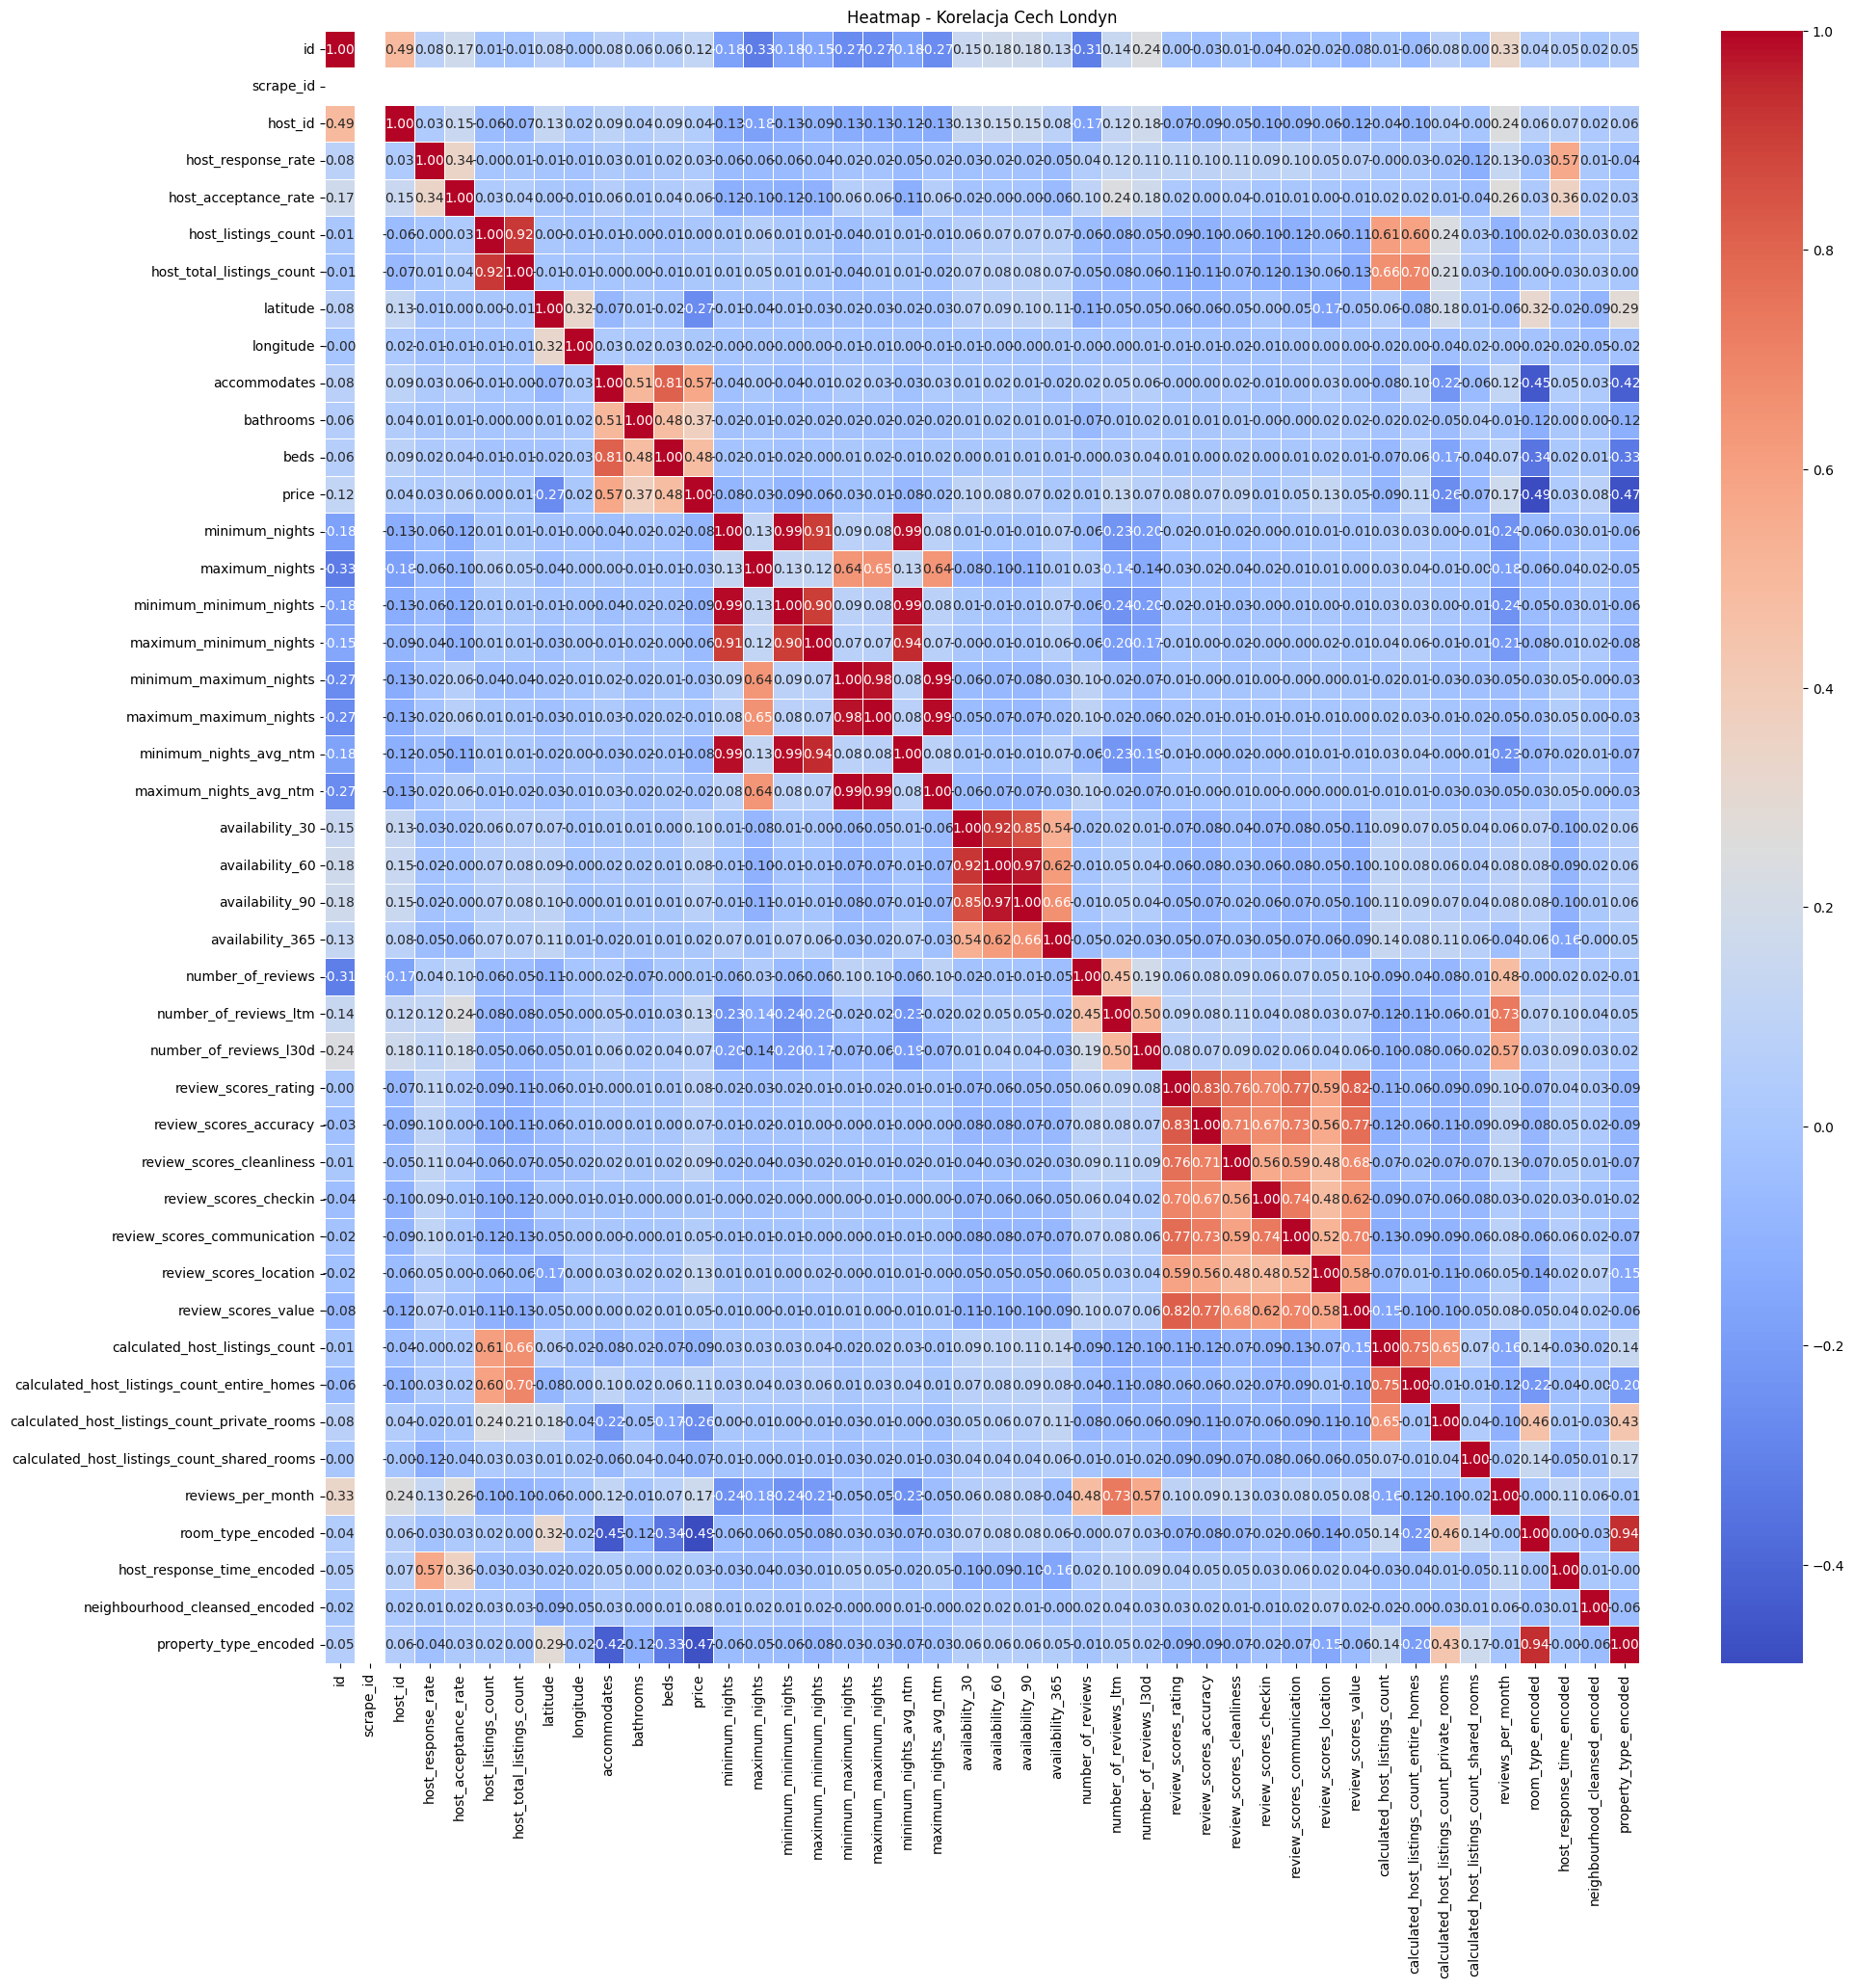

In [183]:
# Korelacja cech Toronto
plt.figure(figsize=(22, 22))
sns.heatmap(dataT.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap - Korelacja Cech Londyn')
plt.show()

## XGBoost - 10 cech

In [184]:
# najlepsze znalezione cechy

best_featuresTX = ['host_response_rate', 'beds', 'availability_90', 'bathrooms', 'maximum_minimum_nights', 'latitude',
'calculated_host_listings_count_private_rooms', 'maximum_nights', 'property_type_encoded', 'number_of_reviews_ltm']

# r2 = 0.537

In [185]:
dataT_subset = dataT.loc[:, best_featuresTX + ['price']]

X = dataT_subset.loc[:, best_featuresTX]
y = np.array(dataT['price'])

X_trainTX, X_testTX, y_trainTX, y_testTX = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X_trainTX, y_trainTX)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [187]:
predictedTX = model.predict(X_testTX)
list(zip(y_testTX[0:10], predictedTX[0:10]))

[(110.0, 142.73555),
 (185.0, 216.83429),
 (40.0, 43.61972),
 (34.0, 53.742424),
 (140.0, 178.23195),
 (225.0, 187.1292),
 (299.0, 119.93796),
 (61.0, 83.97462),
 (88.0, 83.789894),
 (100.0, 180.56433)]

In [188]:
px.histogram(y_testTX - predictedTX)

In [189]:
# rmse
np.sqrt(mean_squared_error(y_testTX, predictedTX))

55.550168053869

In [190]:
# explained variance
explained_variance_score(y_testTX, predictedTX)

0.536910311730342

In [191]:
# r2
RX10 = r2_score(y_testTX, predictedTX)
print(RX10)

0.5366998581117136


### XAI - Shapley values

In [192]:
#Playing with Shapley values
explainerT = shap.TreeExplainer(model)
shap_valuesT = explainerT.shap_values(X_testTX)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:53:28] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



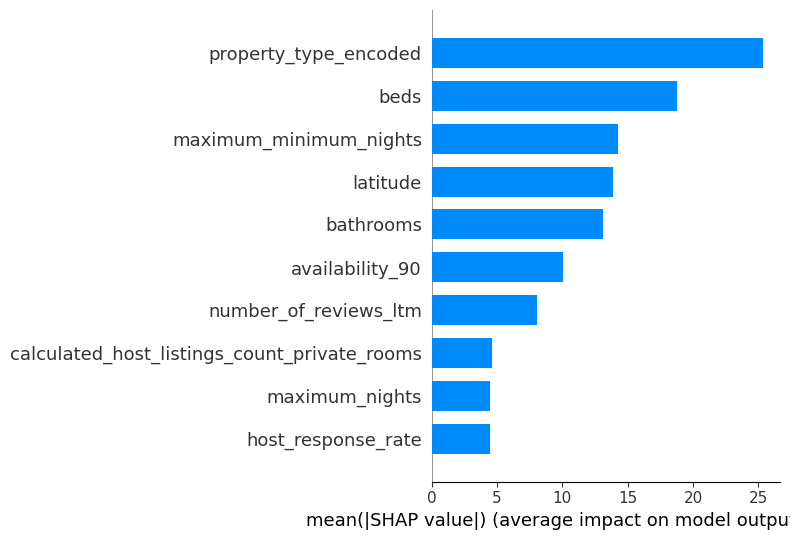

In [193]:
shap.summary_plot(shap_valuesT, X_testTX, plot_type="bar")

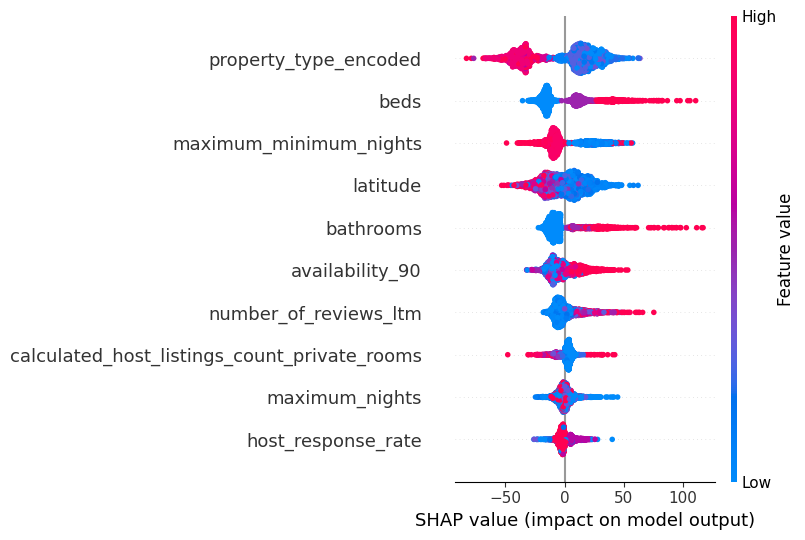

In [194]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_valuesT, features=X_testTX, feature_names=X_testTX.columns)

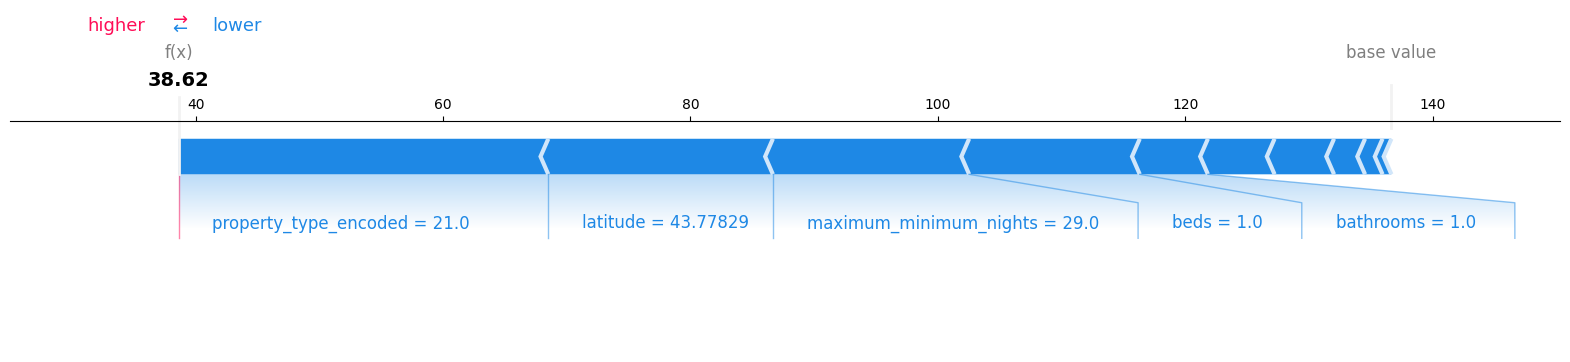

In [195]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.force_plot(explainerT.expected_value, shap_valuesT[50,:], X_testTX.iloc[50,:], matplotlib=True)

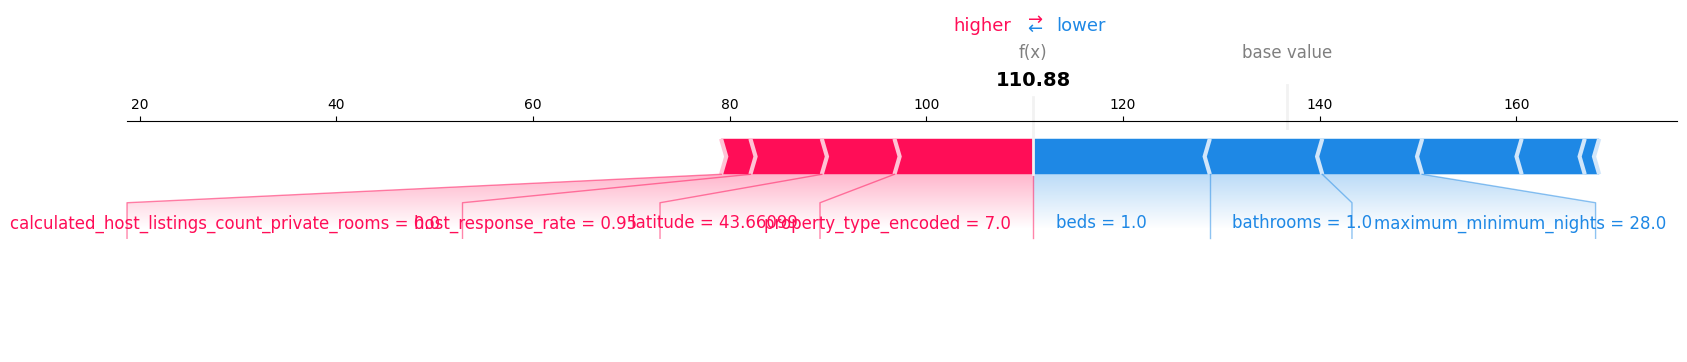

In [196]:
shap.force_plot(explainerT.expected_value, shap_valuesT[610,:], X_testTX.iloc[610,:], matplotlib=True)

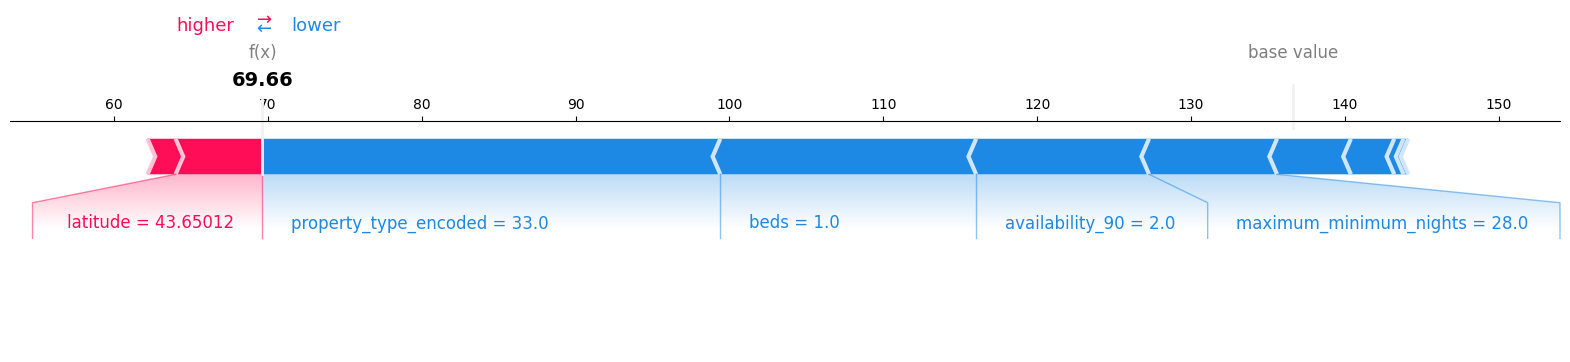

In [197]:
shap.force_plot(explainerT.expected_value, shap_valuesT[605,:], X_testTX.iloc[605,:], matplotlib=True)

## XGBoost - 5 cech

In [198]:
best_featuresTX = ['property_type_encoded', 'beds', 'maximum_minimum_nights', 'latitude', 'bathrooms']
# Najwyższy wynik R-squared: 0.571

In [199]:
dataT_subset = dataT.loc[:, best_featuresTX + ['price']]

X = dataT_subset.loc[:, best_featuresTX]
y = np.array(dataT['price'])

X_trainTX, X_testTX, y_trainTX, y_testTX = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
model = xgboost.XGBRegressor(n_estimators=200, verbosity=1)
model.fit(X_trainTX, y_trainTX)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [201]:
predictedTX = model.predict(X_testTX)
list(zip(y_testTX[0:10], predictedTX[0:10]))

[(110.0, 151.56839),
 (185.0, 209.08318),
 (40.0, 64.31326),
 (34.0, 74.44554),
 (140.0, 147.95975),
 (225.0, 233.9084),
 (299.0, 173.46298),
 (61.0, 102.553986),
 (88.0, 66.263596),
 (100.0, 230.58932)]

In [202]:
px.histogram(y_testTX - predictedTX)

In [203]:
# rmse
np.sqrt(mean_squared_error(y_testTX, predictedTX))

60.494510679111436

In [204]:
# explained variance
explained_variance_score(y_testTX, predictedTX)

0.45096670433373764

In [205]:
# r2
RX5 = r2_score(y_testTX, predictedTX)
print(RX5)

0.4505557720703627


### XAI - Shapley values

In [206]:
#Playing with Shapley values
explainerT = shap.TreeExplainer(model)
shap_valuesT = explainerT.shap_values(X_testTX)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:53:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



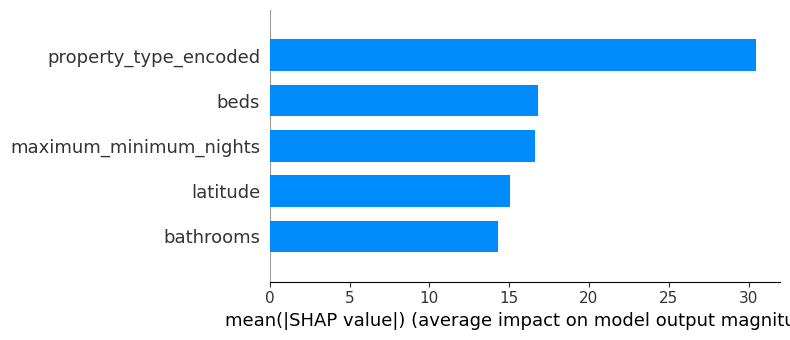

In [207]:
shap.summary_plot(shap_valuesT, X_testTX, plot_type="bar")

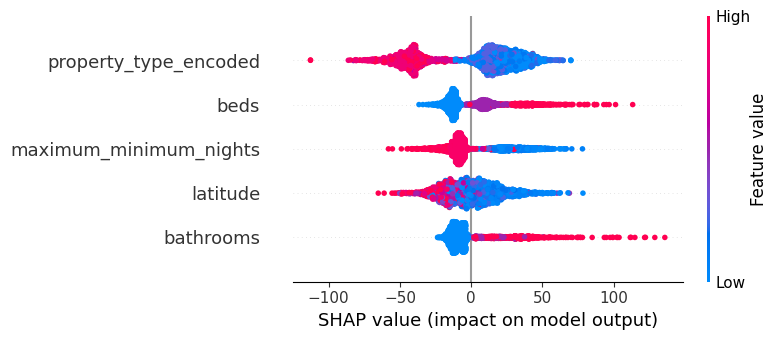

In [208]:
#From official documentation:
'''The summary plot combines feature importance with feature effects.
Each point on the summary plot is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.
The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution
of the Shapley values per feature. The features are ordered according to their importance.'''
# So from this plot we can read that guests_included and bedrooms are the most important variables
#    and high number of guests_included/bedrooms is linked to higher price
shap.summary_plot(shap_valuesT, features=X_testTX, feature_names=X_testTX.columns)

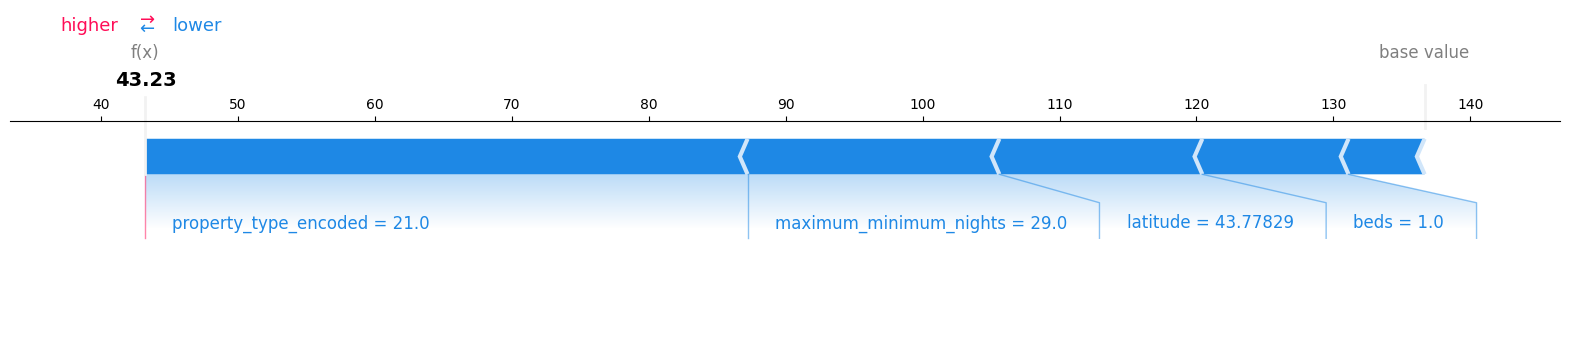

In [209]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
shap.force_plot(explainerT.expected_value, shap_valuesT[50,:], X_testTX.iloc[50,:], matplotlib=True)

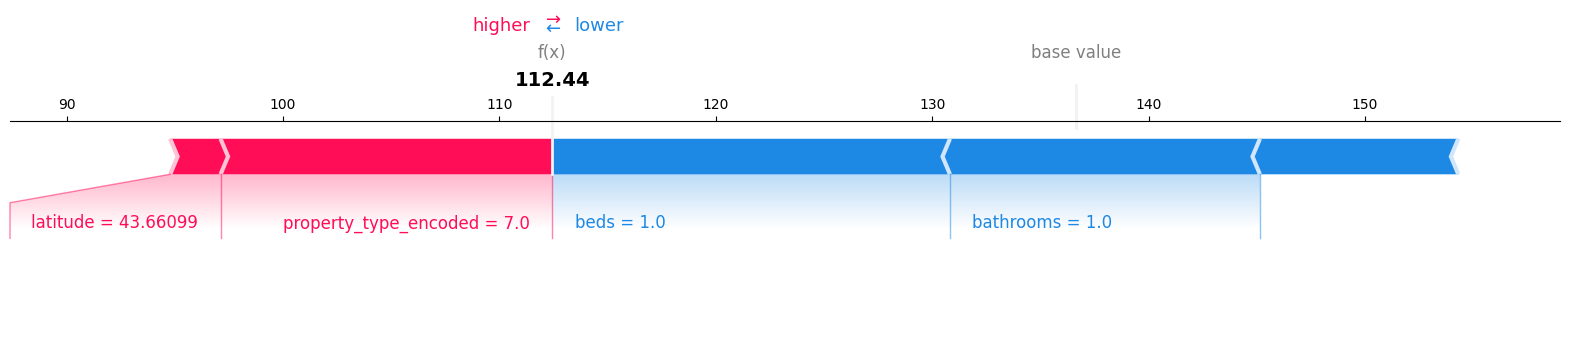

In [210]:
shap.force_plot(explainerT.expected_value, shap_valuesT[610,:], X_testTX.iloc[610,:], matplotlib=True)

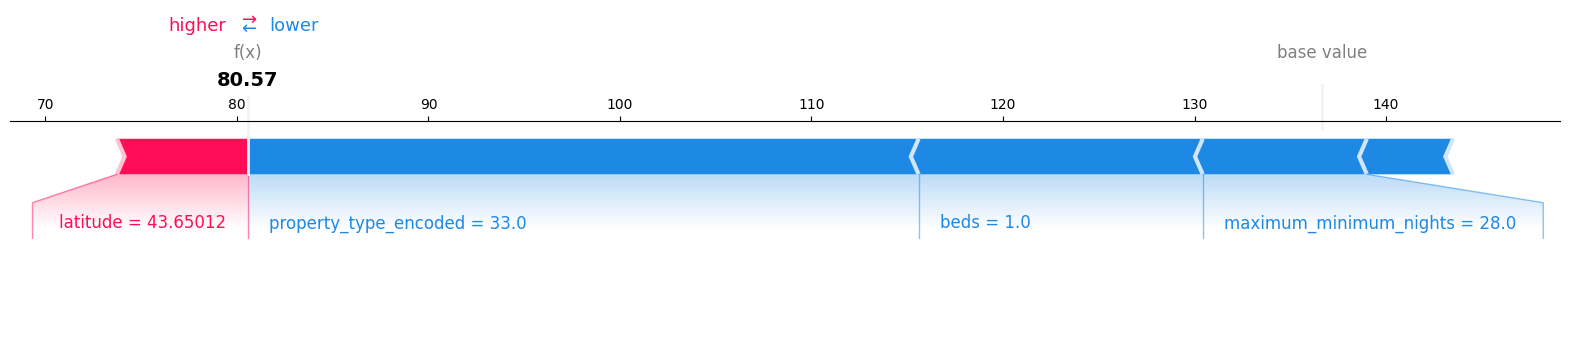

In [211]:
shap.force_plot(explainerT.expected_value, shap_valuesT[605,:], X_testTX.iloc[605,:], matplotlib=True)

## Regresja liniowa

In [212]:
# Sprawdzenie czy wszystkie dane typów innych niż object nie mają wartości NaN
dataT.dtypes[dataT.dtypes != 'object'].isna().sum()

0

In [213]:
dataT.dtypes[(dataT.dtypes != 'object') & (dataT.dtypes != 'datetime64[ns]')]

id                                                int64
scrape_id                                         int64
host_id                                           int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
latitude                                        float64
longitude                                       float64
accommodates                                      int64
bathrooms                                       float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                  

In [214]:
# get all numeric - just string creation
" + ".join(all_num_featsT)

'host_response_rate + host_acceptance_rate + host_is_superhost + host_listings_count + host_total_listings_count + host_has_profile_pic + latitude + longitude + accommodates + bathrooms + beds + minimum_nights + maximum_nights + minimum_minimum_nights + maximum_minimum_nights + minimum_maximum_nights + maximum_maximum_nights + minimum_nights_avg_ntm + maximum_nights_avg_ntm + has_availability + availability_30 + availability_60 + availability_90 + availability_365 + number_of_reviews + number_of_reviews_ltm + number_of_reviews_l30d + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + instant_bookable + calculated_host_listings_count + calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + calculated_host_listings_count_shared_rooms + reviews_per_month + room_type_encoded + host_response_time_encoded + neighbourhood_cleansed_

In [215]:
model = smf.ols(
    '''
    price ~ host_response_rate +
    host_acceptance_rate +
    host_is_superhost +
    host_listings_count +
    host_total_listings_count +
    host_has_profile_pic +
    latitude +
    longitude +
    accommodates +
    bathrooms +
    beds +
    minimum_nights +
    maximum_nights +
    minimum_minimum_nights +
    maximum_minimum_nights +
    minimum_maximum_nights +
    maximum_maximum_nights +
    minimum_nights_avg_ntm +
    maximum_nights_avg_ntm +
    has_availability +
    availability_30 +
    availability_60 +
    availability_90 +
    availability_365 +
    number_of_reviews +
    number_of_reviews_ltm +
    number_of_reviews_l30d +
    review_scores_rating +
    review_scores_accuracy +
    review_scores_cleanliness +
    review_scores_checkin +
    review_scores_communication +
    review_scores_location +
    review_scores_value +
    instant_bookable +
    calculated_host_listings_count +
    calculated_host_listings_count_entire_homes +
    calculated_host_listings_count_private_rooms +
    calculated_host_listings_count_shared_rooms +
    reviews_per_month
    ''', data = dataT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     276.7
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:54:12   Log-Likelihood:                -72399.
No. Observations:               13102   AIC:                         1.449e+05
Df Residuals:                   13061   BIC:                         1.452e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [216]:
dataT_scaled = dataT.copy()
scaler = StandardScaler()
dataT_scaled[all_num_featsT] = scaler.fit_transform(dataT_scaled[all_num_featsT])
dataT_scaled[all_num_featsT]

host_response_rate  host_acceptance_rate  host_is_superhost  \
1                    0.33                  0.43               1.30   
3                   -0.46                  0.07              -0.77   
7                   -0.07                  0.69              -0.77   
9                   -0.07                 -0.08              -0.77   
10                  -0.07                 -0.08              -0.77   
...                   ...                   ...                ...   
19988                0.33                  0.23               1.30   
19989                0.33                  0.63               1.30   
19990                0.33                  0.63               1.30   
19991                0.33                  0.63               1.30   
19993                0.33                  0.69               1.30   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
1                    -0.08                      -0.13                  0.15   
3                     1.69                       1.67                  0.15   
7                    -0.24                      -0.28                 -6.66   
9                    -0.24                      -0.28                  0.15   
10                   -0.19                      -0.06                  0.15   
...                    ...                        ...                   ...   
19988                -0.19                      -0.24                  0.15   
19989                -0.19                      -0.24                  0.15   
19990                -0.24                       0.59                  0.15   
19991                -0.19                      -0.20                  0.15   
19993                -0.24                      -0.28                  0.15   

       latitude  longitude  accommodates  bathrooms  beds  minimum_nights  \
1          1.00      -1.05          0.00      -0.47  0.33            0.10   
3          0.49       0.37         -0.55      -0.47 -0.68            0.10   
7         -0.55      -0.11         -0.55      -0.47 -0.68            0.10   
9         -0.96       0.00          0.00      -0.47  0.33            0.10   
10        -0.67      -0.46          1.11      -0.47  0.33            0.10   
...         ...        ...           ...        ...   ...             ...   
19988      0.05       0.99          0.00      -0.47  0.33           -0.65   
19989      1.34       3.00         -0.55       0.54 -0.68           -0.62   
19990     -0.71      -0.00          1.66      -0.47  1.34           -0.62   
19991     -0.72      -0.51         -0.55       0.54 -0.68           -0.62   
19993     -0.28       0.05         -0.55      -0.47 -0.68           -0.62   

       maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
1               -0.35                    0.11                    0.04   
3                1.30                    0.11                    0.04   
7               -0.35                    0.11                    0.04   
9                1.30                    0.11                    0.04   
10               1.30                    0.11                    0.04   
...               ...                     ...                     ...   
19988           -0.35                   -0.64                   -0.65   
19989           -0.35                   -0.61                   -0.62   
19990           -0.35                   -0.64                   -0.62   
19991           -1.14                   -0.64                   -0.62   
19993           -0.76                   -0.61                   -0.62   

       minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
1                        0.91                    0.90                    0.08   
3                        0.91                    0.90                    0.08   
7                       -0.72                   -0.74                    0.08   
9                        0.91                    0.90                    0.08   
10        

In [217]:
dataT_subset = dataT_scaled.loc[:, all_num_featsT + ['price']]

Xt = dataT_subset.loc[:,all_num_featsT]
yt = np.array(dataT_subset.price)

X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xt, yt, test_size=0.2)

In [218]:
# model z innej biblioteki - statsmodels.api, w tym przypadku trzeba dodać kolumnę stałych - add_constant
X_trainT = sm.add_constant(X_trainT)
X_testT = sm.add_constant(X_testT)
model = sm.OLS(y_trainT, X_trainT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     234.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:54:12   Log-Likelihood:                -57561.
No. Observations:               10481   AIC:                         1.152e+05
Df Residuals:                   10436   BIC:                         1.155e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [219]:
# usunięcie cech
'''
to_removeT = ['review_scores_accuracy', 'minimum_minimum_nights', 'host_has_profile_pic', 'host_total_listings_count',
              'availability_90', 'availability_365', 'host_is_superhost', 'calculated_host_listings_count', 'minimum_nights_avg_ntm',
              'maximum_minimum_nights', 'host_acceptance_rate', 'host_response_rate', 'maximum_nights', 'review_scores_communication',
              'instant_bookable', 'review_scores_value', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
              'minimum_maximum_nights', 'host_listings_count', 'host_response_time_encoded']

variablesT = list(filter(lambda x: x not in to_removeT, all_num_featsT))
'''
# cechy wzięte z XGBoost - 10 cech dla Toronto

variablesT = ['host_response_rate', 'beds', 'availability_90', 'bathrooms', 'maximum_minimum_nights', 'latitude',
              'calculated_host_listings_count_private_rooms', 'maximum_nights', 'property_type_encoded', 'number_of_reviews_ltm']

dataT_subset = dataT_scaled.loc[:, variablesT + ['price']]

Xt = dataT_subset.loc[:,variablesT]
yt = np.array(dataT_subset.price)

X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xt, yt, test_size=0.2)

X_trainT = sm.add_constant(X_trainT)
X_testT = sm.add_constant(X_testT)
model = sm.OLS(y_trainT, X_trainT).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     793.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:54:12   Log-Likelihood:                -58174.
No. Observations:               10481   AIC:                         1.164e+05
Df Residuals:                   10470   BIC:                         1.164e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [220]:
# Losowanie najlepszych cech - roboczy
'''
best_featuresT = []
best_r2T = -1
best_sizeT = -1

for i in range(100):

    size = 20
    #size = np.random.randint(1, len(dataT_subset.columns[:-1]) + 1)

    variables_sub = np.random.choice(dataT_subset.columns[:-1], size=size, replace=False)

    X = dataT_subset.loc[:,variables_sub]
    y = np.array(dataT_subset.price)
    model = sm.OLS(y, sm.add_constant(X)).fit()

    r2 = r2_score(y, model.predict(sm.add_constant(X)))

    if r2 > best_r2T:
        best_r2T = r2
        best_featuresT = variables_sub
        best_sizeT = size

print("Najlepszy rozmiar:", best_sizeT)
print("Najlepsze cechy:", best_featuresT)
print("Najwyższy wynik R-squared:", best_r2T)
'''

'\nbest_featuresT = []\nbest_r2T = -1\nbest_sizeT = -1\n\nfor i in range(100):\n\n    size = 20\n    #size = np.random.randint(1, len(dataT_subset.columns[:-1]) + 1)\n\n    variables_sub = np.random.choice(dataT_subset.columns[:-1], size=size, replace=False)\n    \n    X = dataT_subset.loc[:,variables_sub]\n    y = np.array(dataT_subset.price)\n    model = sm.OLS(y, sm.add_constant(X)).fit()\n    \n    r2 = r2_score(y, model.predict(sm.add_constant(X)))\n    \n    if r2 > best_r2T:\n        best_r2T = r2\n        best_featuresT = variables_sub\n        best_sizeT = size\n\nprint("Najlepszy rozmiar:", best_sizeT)\nprint("Najlepsze cechy:", best_featuresT)\nprint("Najwyższy wynik R-squared:", best_r2T)\n'

In [221]:
# best_featuresT = list(best_featuresT)

In [222]:
# Kontynuacja roboczego
'''
dataT_subset_ed = dataT_scaled.loc[:, best_featuresT + ['price']]

Xg = dataT_subset_ed.loc[:,best_features]
yg = np.array(dataT_subset_ed.price)

X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xg, yg, test_size=0.2)

X_trainT = sm.add_constant(X_trainT)
X_testT = sm.add_constant(X_testT)
model = sm.OLS(y_trainT, X_trainT).fit()
print(model.summary())
'''

"\ndataT_subset_ed = dataT_scaled.loc[:, best_featuresT + ['price']]\n\nXg = dataT_subset_ed.loc[:,best_features]\nyg = np.array(dataT_subset_ed.price)\n\nX_trainT, X_testT, y_trainT, y_testT = train_test_split(Xg, yg, test_size=0.2)\n\nX_trainT = sm.add_constant(X_trainT)\nX_testT = sm.add_constant(X_testT)\nmodel = sm.OLS(y_trainT, X_trainT).fit()\nprint(model.summary())\n"

### Prediction

In [223]:
# predykcja na zbiorze testowym
y_predT = model.predict(X_testT)

In [224]:
X_testT.reset_index(drop=True, inplace=True)

In [225]:
dataT_model_preds = pd.concat([X_testT, pd.Series(y_testT).rename('price'), model.predict(X_testT).rename('predict')], axis = 1)

In [226]:
dataT_model_preds.tail(3)

const  host_response_rate  beds  availability_90  bathrooms  \
2618   1.00               -1.09 -0.68             1.25      -0.47   
2619   1.00                0.33 -0.68            -0.99      -0.47   
2620   1.00                0.33 -0.68            -1.21      -0.47   

      maximum_minimum_nights  latitude  \
2618                    0.04     -0.33   
2619                    0.04     -0.60   
2620                   -0.55     -0.42   

      calculated_host_listings_count_private_rooms  maximum_nights  \
2618                                          3.68            1.30   
2619                                          0.31            1.30   
2620                                          0.07           -0.76   

      property_type_encoded  number_of_reviews_ltm  price  predict  
2618                   1.18                  -0.63  95.00    75.49  
2619                   1.18                   0.87  82.00    86.77  
2620                   1.18                   1.74 111.00    97.87

### RMSE

In [227]:
# na zbiorze treningowym
np.sqrt(model.mse_resid)

62.30337530122477

In [228]:
# na zbiorze testowym
mse = mean_squared_error(y_testT, y_predT)
rmse = sqrt(mse)
rmse

62.06488199514203

### Residuals

In [229]:
# na zbiorze testowym
dataT_model_preds['residuals'] = dataT_model_preds['price'] - dataT_model_preds['predict']
dataT_model_preds.head(3)

const  host_response_rate  beds  availability_90  bathrooms  \
0   1.00               -0.07 -0.68            -1.18       0.54   
1   1.00               -0.07 -0.68            -1.21      -0.47   
2   1.00                0.33 -0.68             1.25      -0.47   

   maximum_minimum_nights  latitude  \
0                    0.09     -0.46   
1                    0.04      2.07   
2                    0.04     -0.82   

   calculated_host_listings_count_private_rooms  maximum_nights  \
0                                         -0.41           -0.95   
1                                         -0.41            1.30   
2                                         -0.41           -0.76   

   property_type_encoded  number_of_reviews_ltm  price  predict  residuals  
0                  -0.70                  -0.47  73.00   144.14     -71.14  
1                  -0.70                  -0.47  57.00    87.14     -30.14  
2                  -0.34                  -0.55 164.00   140.36      23.64

In [230]:
px.histogram(dataT_model_preds['residuals'])

Text(0, 0.5, 'Residuals')

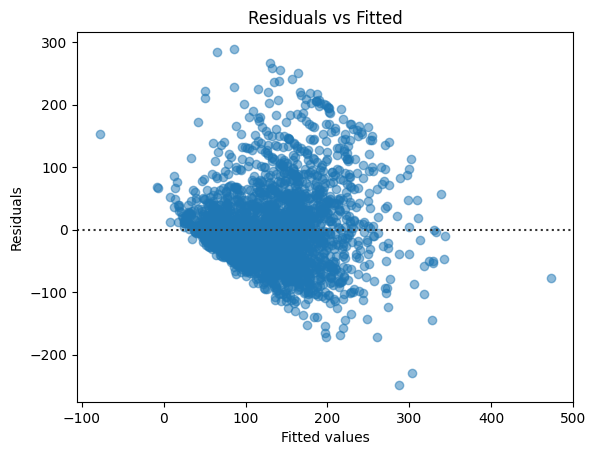

In [231]:
#  Residual plot
plot = sns.residplot(x=dataT_model_preds['predict'], y=dataT_model_preds['residuals'], data=dataT_model_preds,
                     scatter_kws={'alpha': 0.5})
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

## Lasso

(0.0012114836747852136,
 65.23047807079169,
 -27.88456928646068,
 24.530365795025652)

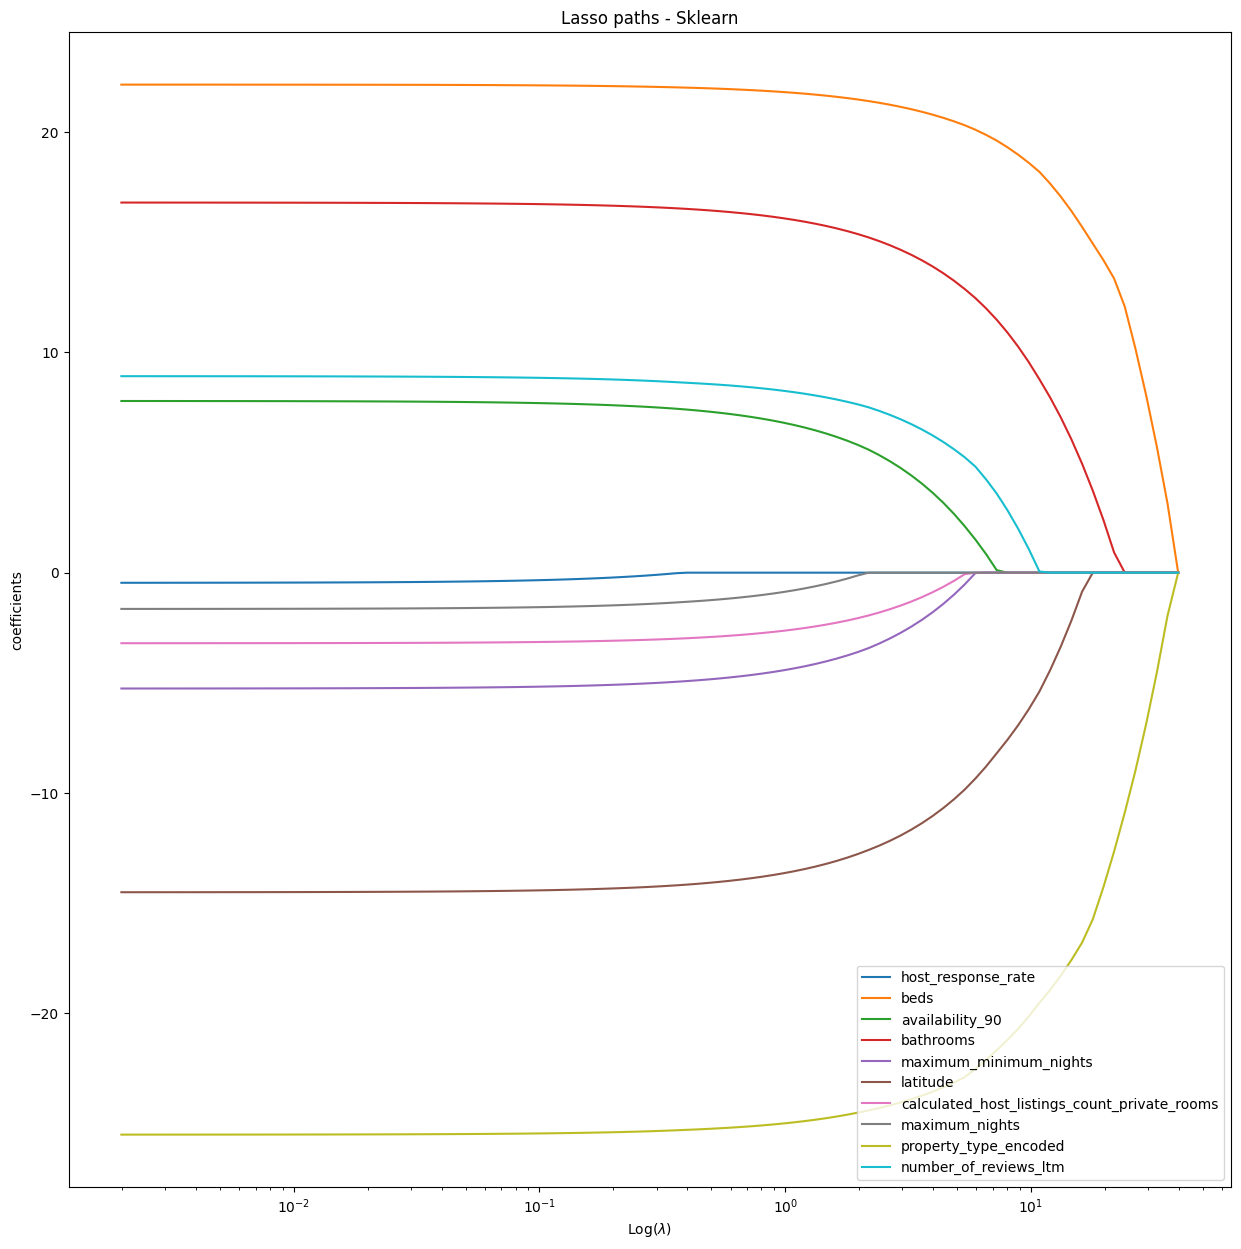

In [232]:
# Lasso

X = dataT_subset.loc[:,variablesT]
y = np.array(dataT_subset.price)

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps = 5e-5)

# Display results
plt.figure(figsize = (15,15))

for i in range(X.shape[1]):
    plt.plot(alphas_lasso, coefs_lasso[i], label = variablesT[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

# Wyniki XGBoost w zal. od l. cech Toronto

Dla 30 cech jest około 0.570  
Dla 10 cech 0.537 <- **zalecane**?  
Dla  5 cech 0.45  
(wzięte z Shapleya)